<h1>laser_cutting<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Импорт-библиотек" data-toc-modified-id="Импорт-библиотек-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Импорт библиотек</a></span></li><li><span><a href="#Данные" data-toc-modified-id="Данные-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Данные</a></span><ul class="toc-item"><li><span><a href="#Загрузка-данных" data-toc-modified-id="Загрузка-данных-2.1"><span class="toc-item-num">2.1&nbsp;&nbsp;</span>Загрузка данных</a></span></li><li><span><a href="#Описание-данных" data-toc-modified-id="Описание-данных-2.2"><span class="toc-item-num">2.2&nbsp;&nbsp;</span>Описание данных</a></span></li></ul></li><li><span><a href="#EDA" data-toc-modified-id="EDA-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>EDA</a></span><ul class="toc-item"><li><span><a href="#Part_name" data-toc-modified-id="Part_name-3.1"><span class="toc-item-num">3.1&nbsp;&nbsp;</span>Part_name</a></span></li><li><span><a href="#Material" data-toc-modified-id="Material-3.2"><span class="toc-item-num">3.2&nbsp;&nbsp;</span>Material</a></span></li><li><span><a href="#Time" data-toc-modified-id="Time-3.3"><span class="toc-item-num">3.3&nbsp;&nbsp;</span>Time</a></span></li><li><span><a href="#Width,-Length" data-toc-modified-id="Width,-Length-3.4"><span class="toc-item-num">3.4&nbsp;&nbsp;</span>Width, Length</a></span></li><li><span><a href="#Сut_length" data-toc-modified-id="Сut_length-3.5"><span class="toc-item-num">3.5&nbsp;&nbsp;</span>Сut_length</a></span></li><li><span><a href="#Cut_quantity" data-toc-modified-id="Cut_quantity-3.6"><span class="toc-item-num">3.6&nbsp;&nbsp;</span>Cut_quantity</a></span></li><li><span><a href="#Визуализация" data-toc-modified-id="Визуализация-3.7"><span class="toc-item-num">3.7&nbsp;&nbsp;</span>Визуализация</a></span></li><li><span><a href="#Feature-engineering" data-toc-modified-id="Feature-engineering-3.8"><span class="toc-item-num">3.8&nbsp;&nbsp;</span>Feature engineering</a></span></li><li><span><a href="#Кодирование-и-заполнение-пропусков" data-toc-modified-id="Кодирование-и-заполнение-пропусков-3.9"><span class="toc-item-num">3.9&nbsp;&nbsp;</span>Кодирование и заполнение пропусков</a></span></li><li><span><a href="#Визуализация-(признак-\-target)" data-toc-modified-id="Визуализация-(признак-\-target)-3.10"><span class="toc-item-num">3.10&nbsp;&nbsp;</span>Визуализация (признак \ target)</a></span></li></ul></li><li><span><a href="#Модель" data-toc-modified-id="Модель-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Модель</a></span></li></ul></div>

# Импорт библиотек

In [313]:
import numpy as np 
import pandas as pd
from datetime import datetime, time, timedelta
import re

from sklearn.preprocessing import StandardScaler
from sklearn.impute import KNNImputer
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import StandardScaler

import matplotlib
import matplotlib.pyplot as plt
matplotlib.style.use('ggplot')
%matplotlib inline

import plotly
import plotly.express as px
import plotly.graph_objs as go
from plotly.subplots import make_subplots
import seaborn as sns



pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)
pd.set_option('display.max_colwidth', None)
pd.set_option('display.float_format', lambda x: '%.3f' % x)

# Данные

## Загрузка данных

In [314]:
link = "/home/mikhail/projects/laser_cutting/data/Лазерная резка.csv"

In [315]:
cutting = pd.read_csv(link, on_bad_lines="skip")
backup = cutting.copy()

In [316]:
cutting.head(3)

,Наименование,Материал,Операция,hash,Время,Ширина,Длина,Длина реза,Кол-во резов
0,Круг 40,"Лист х/к т. 3,0 мм.",ЛР,42af1b9fc3,00:00:03.5,40.000,40.000,126,1
1,Круг 40,"Лист х/к т. 3,0 мм.",ЛР,42af1b9fc3,00:00:03.5,40.000,40.000,126,1
2,Круг 40,"Лист х/к т. 3,0 мм.",ЛР,42af1b9fc3,00:00:03.5,40.000,40.000,126,1


Сразу переведем зоголовки признаков

In [317]:
cutting.rename(columns={'Наименование': 'Part_name',
                        'Материал': 'Material',
                        'Время': 'Time',
                        'Ширина': 'Width',
                        'Длина': 'Length',
                        'Длина реза': 'Cut_length',
                        'Кол-во резов': 'Cut_quantity',
                        'Операция': 'Operation'}, inplace=True)

In [318]:
cutting.head(3)

,Part_name,Material,Operation,hash,Time,Width,Length,Cut_length,Cut_quantity
0,Круг 40,"Лист х/к т. 3,0 мм.",ЛР,42af1b9fc3,00:00:03.5,40.000,40.000,126,1
1,Круг 40,"Лист х/к т. 3,0 мм.",ЛР,42af1b9fc3,00:00:03.5,40.000,40.000,126,1
2,Круг 40,"Лист х/к т. 3,0 мм.",ЛР,42af1b9fc3,00:00:03.5,40.000,40.000,126,1


## Описание данных

Данные выгружены с производства металлических изделий. 

Происходит операция раскроя заготовок на станках лазерной резки.

Станки вырезают металлические заготовки разных форм и размеров из разных материалов, для дольнейшего производста. 

- Part_name - Наименование изделия. Так, как сотрудник забил его в систему.
- Material - Наименование материала, тоже так, как его записал сотрудник.
- Operation - Тип операции, Листовой лазер (ЛР) или трубный лазер (ТР)
- hash - хеш операции, записано станком
- Time - время резки заготовки
- Length - Длина заготовки (габаритная)
- Width - Ширина заготовки (габаритная)
- Сut_length - длина линии реза
- Cut_quantity - количество врезок

---
ЗАДАЧА

---

Предсказать время резки для новой заготовки










# EDA

In [319]:
cutting.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 484609 entries, 0 to 484608
Data columns (total 9 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   Part_name     484609 non-null  object 
 1   Material      484609 non-null  object 
 2   Operation     484609 non-null  object 
 3   hash          484609 non-null  object 
 4   Time          484609 non-null  object 
 5   Width         484609 non-null  float64
 6   Length        484609 non-null  float64
 7   Cut_length    484609 non-null  int64  
 8   Cut_quantity  484609 non-null  int64  
dtypes: float64(2), int64(2), object(5)
memory usage: 33.3+ MB


На первый взгляд все заполнено, будем смотреть столбцы по одному

Явно есть дубликаты, так что посмотрим их по столбцу hash

In [320]:
cutting[cutting.duplicated(subset='hash')]

,Part_name,Material,Operation,hash,Time,Width,Length,Cut_length,Cut_quantity
1,Круг 40,"Лист х/к т. 3,0 мм.",ЛР,42af1b9fc3,00:00:03.5,40.000,40.000,126,1
2,Круг 40,"Лист х/к т. 3,0 мм.",ЛР,42af1b9fc3,00:00:03.5,40.000,40.000,126,1
3,Круг 40,"Лист х/к т. 3,0 мм.",ЛР,42af1b9fc3,00:00:03.5,40.000,40.000,126,1
4,Круг 40,"Лист х/к т. 3,0 мм.",ЛР,42af1b9fc3,00:00:03.5,40.000,40.000,126,1
5,Круг 40,"Лист х/к т. 3,0 мм.",ЛР,42af1b9fc3,00:00:03.5,40.000,40.000,126,1
...,...,...,...,...,...,...,...,...,...
484604,37.216-3.02 ЮНИТ-2Д МИНИ Пластина нижняя,"Лист х/к т. 1,5 мм.",ЛР,23dfc562ca,00:00:04.7,180.000,110.000,558,2
484605,37.216-3.02 ЮНИТ-2Д МИНИ Пластина нижняя,"Лист х/к т. 1,5 мм.",ЛР,23dfc562ca,00:00:04.8,180.000,110.000,558,2
484606,37.216-3.02 ЮНИТ-2Д МИНИ Пластина нижняя,"Лист х/к т. 1,5 мм.",ЛР,23dfc562ca,00:00:04.7,180.000,110.000,558,2
484607,37.216-3.02 ЮНИТ-2Д МИНИ Пластина нижняя,"Лист х/к т. 1,5 мм.",ЛР,23dfc562ca,00:00:04.7,180.000,110.000,558,2


In [321]:
cutting['hash'].value_counts()

hash
028252ed1     10009
1bc5d0b97      7502
0305fba64      4979
39d678ef5d     4756
1d2c2c93e      4000
              ...  
7853f184f7        1
8417d785af        1
79f1e916d3        1
79546f4211        1
28ed570cf         1
Name: count, Length: 17830, dtype: int64

Кажется тут очень много одних и тех же деталей 

А вот это, предположительно, реальное количество разных уникальных деталей - остальное повторы

In [322]:
len(cutting['hash'].unique())

17830

In [323]:
cutting.drop_duplicates(subset='hash', inplace=True)

In [324]:
cutting

,Part_name,Material,Operation,hash,Time,Width,Length,Cut_length,Cut_quantity
0,Круг 40,"Лист х/к т. 3,0 мм.",ЛР,42af1b9fc3,00:00:03.5,40.000,40.000,126,1
14,"След 1,3 ст3.Л3,0","Лист х/к т. 3,0 мм.",ЛР,42d871d3ed,00:00:07.5,62.000,111.000,304,1
17,100-15.214.03 Перекладина низ,"Труба проф. 40*40*2,0",ТР,1588a8230e,00:00:46.7,356.000,155.000,581,12
32,Стойка центр.-2 Тр 40х40х2,"Труба проф. 40*40*2,0",ТР,159f68e7c2,00:00:53.3,1156.000,155.000,517,15
57,100-15.214.04 Стойка,"Труба проф. 40*40*2,0",ТР,15b9fcda05,00:01:44.9,1576.000,155.000,714,35
...,...,...,...,...,...,...,...,...,...
484525,99.455-3.01 ТУРОН 40х20х2 Балка поддержки,"Труба проф. 40*20*2,0",ТР,18388e1a71,00:00:42.8,265.000,115.000,469,8
484526,облако,"Лист х/к т. 1,5 мм.",ЛР,340c586b88,00:00:07.9,48.000,61.000,229,5
484561,Швеллер 15х25х15х1810 с овал.перф,"Лист х/к т. 1,5 мм.",ЛР,16788de56e,00:01:45.4,1810.000,50.000,6537,73
484564,Мангал складной_Черная сталь 1.5 мм_Деталь 1501,"Лист х/к т. 1,5 мм.",ЛР,3696257c07,00:00:11.2,221.000,52.000,747,9


Далее пойдем по признакам по очереди

## Part_name

Тут в целом может быть записано все, что угодно

Можно попытаться разбить децимальный номер и наименование (часто оно характеризует форму\вид детали)

In [325]:
cutting['Part_name'].value_counts()[:40]

Part_name
Ребро для опоры 60х30, возв. 10, тр. 40х20, смещ. 12 мм              77
Ребро для опоры 40х40, возв.10, насквозь, тр.40х20 смещ.12           46
FUR.4001.001 КЕО МОБИ Кронштейн кабель-канала одинарного (верный)    39
Ребро для опоры 60х30, возв.10, насквозь, тр.40х20 Ст3 Л4,0          33
28.313.02 СКАТЛ Боковина Л1.2                                        27
Ребро для опоры 40х40 мм, возв.10, насквозь, тр.40х20                25
01.341.01 П2 Перекладина д. 25 (на 2 бутыли) перенесен рез           24
Пластина нижняя толщ. 4мм 15х58мм S=0.0009м2                         23
01.132.02 Основание стойки Тр. д. 30 ИЗМ                             23
01.131.03 Бутыледержатель Тр. д.25х1,5 ИЗМ                           22
01.211.01 БС4 Стойка на 4 полки (заовал.отв)                         22
01.200.04 СТЕЛЛА Перемычка нижняя L365                               22
37.214-1.05 Кронштейн                                                21
Кронштейн Custom ПРАВЫЙ СБ                            

Странно, что осталось очень много одинаковых наименований. Думаю это все одно и то же, но резалось в разные дни или разными партиями

In [326]:
duplicate_names = cutting['Part_name'][cutting['Part_name'].duplicated()]

# Отфильтровать строки, где значения в столбце совпадают с дублирующимися значениями
cutting[cutting['Part_name'].isin(duplicate_names)].sort_values(by='Part_name')[:50]

,Part_name,Material,Operation,hash,Time,Width,Length,Cut_length,Cut_quantity
24290,(01) 220711.220.002 Фланец,"Лист г/к т. 8,0 мм.",ЛР,34f90f9de5,00:01:40.1,80.000,180.000,1134,19
24276,(01) 220711.220.002 Фланец,"Лист г/к т. 8,0 мм.",ЛР,349783022d,00:01:40.1,80.000,180.000,1134,19
24292,(01) 220714.220.006 Фланец,"Лист г/к т. 8,0 мм.",ЛР,341b857b18,00:02:03.7,185.000,198.000,1611,29
24281,(01) 220714.220.006 Фланец,"Лист г/к т. 8,0 мм.",ЛР,349ef5092c,00:02:08.9,185.000,198.000,1611,29
442663,00001.04.120-01 - 430нерж!!,"Лист нерж. т. 1,5 мм. (AISI 430) мат.",ЛР,5cba7a52c,00:00:10.6,120.000,120.000,559,5
208875,00001.04.120-01 - 430нерж!!,"Лист нерж. т. 1,5 мм. (AISI 430) мат.",ЛР,54b350c9f,00:00:10.8,120.000,120.000,559,5
429217,00001.04.170-01 - 430 нерж!!!,"Лист нерж. т. 1,5 мм. (AISI 430) мат.",ЛР,81ed4fbc36,00:00:12.4,170.000,170.000,809,9
116627,00001.04.170-01 - 430 нерж!!!,"Лист нерж. т. 1,5 мм. (AISI 430) мат.",ЛР,76787113d6,00:00:12.4,170.000,170.000,809,9
299202,00001.04.170-01 - 430 нерж!!!,"Лист нерж. т. 1,5 мм. (AISI 430) мат.",ЛР,92e3d03cb1,00:00:12.5,170.000,170.000,809,9
454152,00001.04.170-01 - 430 нерж!!!,"Лист нерж. т. 1,5 мм. (AISI 430) мат.",ЛР,226a61b531,00:00:12.4,170.000,170.000,809,9


теория подтверждается, т.к помимо имени совпадают и другие характеристики

время резки меняется в пределах погрешности

Возможно, удалять не стоило. Нужно будет проверить на метриках

In [327]:
cutting.drop_duplicates(subset='Part_name', inplace=True)
cutting

,Part_name,Material,Operation,hash,Time,Width,Length,Cut_length,Cut_quantity
0,Круг 40,"Лист х/к т. 3,0 мм.",ЛР,42af1b9fc3,00:00:03.5,40.000,40.000,126,1
14,"След 1,3 ст3.Л3,0","Лист х/к т. 3,0 мм.",ЛР,42d871d3ed,00:00:07.5,62.000,111.000,304,1
17,100-15.214.03 Перекладина низ,"Труба проф. 40*40*2,0",ТР,1588a8230e,00:00:46.7,356.000,155.000,581,12
32,Стойка центр.-2 Тр 40х40х2,"Труба проф. 40*40*2,0",ТР,159f68e7c2,00:00:53.3,1156.000,155.000,517,15
57,100-15.214.04 Стойка,"Труба проф. 40*40*2,0",ТР,15b9fcda05,00:01:44.9,1576.000,155.000,714,35
...,...,...,...,...,...,...,...,...,...
484239,кот,"Лист х/к т. 1,5 мм.",ЛР,3440361497,00:00:14.4,50.000,75.000,376,4
484390,кот лицо,"Лист х/к т. 1,5 мм.",ЛР,34ee7f970c,00:00:20.2,50.000,68.000,438,9
484525,99.455-3.01 ТУРОН 40х20х2 Балка поддержки,"Труба проф. 40*20*2,0",ТР,18388e1a71,00:00:42.8,265.000,115.000,469,8
484526,облако,"Лист х/к т. 1,5 мм.",ЛР,340c586b88,00:00:07.9,48.000,61.000,229,5


Количество данных стремительно сокращается..

Теперь точно только уникальные

ну да ладно, вернемся к нашим деталям

In [328]:
cutting['Part_name'].value_counts()[:40]

Part_name
Круг 40                                                                   1
1.5mm_1502                                                                1
60.05.02 40x20-Tn1,5-450-2 Труба                                          1
18-1.406.01Л ПАНТОВА 40х40 Стойка ЛЕВАЯ выс. 705                          1
18-1.406.02 ПАНТОВА 40х40 Перекладина верхняя шир.1600 мм                 1
18-1.471.02 ПАНТОВА 40х40 Перекладина шир. 800 L794                       1
18-1.406.01ПР ПАНТОВА 40х40 Стойка ПРАВАЯ выс. 705                        1
Ребро проходное для опоры 50х50, возв.10, тр. 40х20, смещ. 12, нижнее     1
1.5mm_1501                                                                1
Ребро проходное для опоры 50х50, возв.10, тр. 40х20, смещ. 12, верхнее    1
99.520.09 Ребро 25х25х4                                                   1
60.05.02 40x20-Tn1,5-720-2 Труба                                          1
99.520.10 Заглушка 30х30х4                                                1
80

Идея такая:
- вытащить все слова просто списком в отдельный признак. Будут как ключевы слова

In [329]:
def get_keywords(name):
    # Определяем список предлогов и несущественных слов, которые нужно исключить
    stop_words = {'и', 'в', 'на', 'с', 'под', 'за',
                  'для', 'по', 'от', 'до', 'над', 
                  'через', 'у', 'о', 'об', 'при', 
                  'из', 'а', 'но', 'или', 'xx', 'хх'}
    
    name = re.sub(r'[\W_]', ' ', name)


    # Удаляем нетекстовые символы и числа
    name = re.sub(r'[^А-Яа-яЁё\s]', '', name)
    
    # Разбиваем строку на слова и удаляем лишние пробелы
    words = name.strip().split()
    
    # Фильтруем слова, исключая предлоги и слова, которые короче 2 символов
    keywords = [word.lower() for word in words if word.lower() not in stop_words and len(word) > 1]
    
    return keywords

In [330]:
cutting['keywords'] = cutting['Part_name'].apply(get_keywords)

In [331]:
cutting

,Part_name,Material,Operation,hash,Time,Width,Length,Cut_length,Cut_quantity,keywords
0,Круг 40,"Лист х/к т. 3,0 мм.",ЛР,42af1b9fc3,00:00:03.5,40.000,40.000,126,1,[круг]
14,"След 1,3 ст3.Л3,0","Лист х/к т. 3,0 мм.",ЛР,42d871d3ed,00:00:07.5,62.000,111.000,304,1,"[след, ст]"
17,100-15.214.03 Перекладина низ,"Труба проф. 40*40*2,0",ТР,1588a8230e,00:00:46.7,356.000,155.000,581,12,"[перекладина, низ]"
32,Стойка центр.-2 Тр 40х40х2,"Труба проф. 40*40*2,0",ТР,159f68e7c2,00:00:53.3,1156.000,155.000,517,15,"[стойка, центр, тр]"
57,100-15.214.04 Стойка,"Труба проф. 40*40*2,0",ТР,15b9fcda05,00:01:44.9,1576.000,155.000,714,35,[стойка]
...,...,...,...,...,...,...,...,...,...,...
484239,кот,"Лист х/к т. 1,5 мм.",ЛР,3440361497,00:00:14.4,50.000,75.000,376,4,[кот]
484390,кот лицо,"Лист х/к т. 1,5 мм.",ЛР,34ee7f970c,00:00:20.2,50.000,68.000,438,9,"[кот, лицо]"
484525,99.455-3.01 ТУРОН 40х20х2 Балка поддержки,"Труба проф. 40*20*2,0",ТР,18388e1a71,00:00:42.8,265.000,115.000,469,8,"[турон, балка, поддержки]"
484526,облако,"Лист х/к т. 1,5 мм.",ЛР,340c586b88,00:00:07.9,48.000,61.000,229,5,[облако]


In [332]:
cutting_keywords = cutting.explode('keywords')

In [333]:
cutting_keywords

,Part_name,Material,Operation,hash,Time,Width,Length,Cut_length,Cut_quantity,keywords
0,Круг 40,"Лист х/к т. 3,0 мм.",ЛР,42af1b9fc3,00:00:03.5,40.000,40.000,126,1,круг
14,"След 1,3 ст3.Л3,0","Лист х/к т. 3,0 мм.",ЛР,42d871d3ed,00:00:07.5,62.000,111.000,304,1,след
14,"След 1,3 ст3.Л3,0","Лист х/к т. 3,0 мм.",ЛР,42d871d3ed,00:00:07.5,62.000,111.000,304,1,ст
17,100-15.214.03 Перекладина низ,"Труба проф. 40*40*2,0",ТР,1588a8230e,00:00:46.7,356.000,155.000,581,12,перекладина
17,100-15.214.03 Перекладина низ,"Труба проф. 40*40*2,0",ТР,1588a8230e,00:00:46.7,356.000,155.000,581,12,низ
...,...,...,...,...,...,...,...,...,...,...
484564,Мангал складной_Черная сталь 1.5 мм_Деталь 1501,"Лист х/к т. 1,5 мм.",ЛР,3696257c07,00:00:11.2,221.000,52.000,747,9,складной
484564,Мангал складной_Черная сталь 1.5 мм_Деталь 1501,"Лист х/к т. 1,5 мм.",ЛР,3696257c07,00:00:11.2,221.000,52.000,747,9,черная
484564,Мангал складной_Черная сталь 1.5 мм_Деталь 1501,"Лист х/к т. 1,5 мм.",ЛР,3696257c07,00:00:11.2,221.000,52.000,747,9,сталь
484564,Мангал складной_Черная сталь 1.5 мм_Деталь 1501,"Лист х/к т. 1,5 мм.",ЛР,3696257c07,00:00:11.2,221.000,52.000,747,9,мм


In [334]:
cutting_keywords['keywords'].value_counts()[0:15]

keywords
мм             2113
перекладина     953
стойка          948
пластина        747
тр              570
тбнд            558
дл              545
шир             543
балка           481
фланец          375
кронштейн       373
ребро           300
выс             291
пр              274
стола           270
Name: count, dtype: int64

In [335]:
cutting_keywords['keywords'].value_counts()[-15:-1:1]

keywords
активатор         1
керноотборника    1
осн               1
одинаковым        1
направлением      1
рисунка           1
намаз             1
ручкой            1
реборды           1
рр                1
железо            1
керамика          1
кевлар            1
резьбу            1
Name: count, dtype: int64

Присвою каждому сэмплу минимальное значение из ключевых слов (логика в том, чтобы выявить что то редкое)

In [336]:
keywords_counts = cutting_keywords['keywords'].value_counts().to_dict()

cutting_keywords['keyword_count'] = cutting_keywords['keywords'].map(keywords_counts)

cutting_keywords = cutting_keywords.groupby(cutting_keywords.index)['keyword_count'].mean()
cutting_keywords=pd.DataFrame(cutting_keywords)

In [337]:
cutting_keywords['keyword_count'].isna().sum()

2571

In [338]:
len(cutting_keywords['keyword_count'])

11243

In [339]:
cutting['keywords_count'] = cutting_keywords['keyword_count']
cutting[0:10]

,Part_name,Material,Operation,hash,Time,Width,Length,Cut_length,Cut_quantity,keywords,keywords_count
0,Круг 40,"Лист х/к т. 3,0 мм.",ЛР,42af1b9fc3,00:00:03.5,40.000,40.000,126,1,[круг],7.000
14,"След 1,3 ст3.Л3,0","Лист х/к т. 3,0 мм.",ЛР,42d871d3ed,00:00:07.5,62.000,111.000,304,1,"[след, ст]",111.000
17,100-15.214.03 Перекладина низ,"Труба проф. 40*40*2,0",ТР,1588a8230e,00:00:46.7,356.000,155.000,581,12,"[перекладина, низ]",514.500
32,Стойка центр.-2 Тр 40х40х2,"Труба проф. 40*40*2,0",ТР,159f68e7c2,00:00:53.3,1156.000,155.000,517,15,"[стойка, центр, тр]",512.000
57,100-15.214.04 Стойка,"Труба проф. 40*40*2,0",ТР,15b9fcda05,00:01:44.9,1576.000,155.000,714,35,[стойка],948.000
68,АДЛБ.745551.002 Шпангоут,"Лист х/к т. 3,0 мм.",ЛР,45c1ca3b3a,00:00:15.8,200.000,30.000,509,5,"[адлб, шпангоут]",2.500
70,Перекладина нижн. центр. Тр 40х40х2,"Труба проф. 40*40*2,0",ТР,155c63daf0,00:00:39.0,357.000,155.000,533,9,"[перекладина, нижн, центр, тр]",388.250
73,Стойка центр.-1 Тр 40х40х2,"Труба проф. 40*40*2,0",ТР,15976f5ffe,00:01:23.4,1576.000,155.000,639,27,"[стойка, центр, тр]",512.000
322,Перекладина верх. центр. Тр 40х40х2,"Труба проф. 40*40*2,0",ТР,15c43a81bb,00:00:39.2,316.000,155.000,447,10,"[перекладина, верх, центр, тр]",407.000
372,19-1.011.02 ИГО-51 Фланец 130х130,"Лист х/к т. 3,0 мм.",ЛР,74a914cf03,00:00:18.5,135.000,120.000,641,5,"[иго, фланец]",192.000


In [340]:
cutting[cutting['keywords_count'].isna()]

,Part_name,Material,Operation,hash,Time,Width,Length,Cut_length,Cut_quantity,keywords,keywords_count
3576,29023.01.01_02,"Лист г/к т. 5,0 мм.",ЛР,9420b9a03c,00:00:20.1,74.000,120.000,542,3,[],NaN
3586,00050.00.02.002.01,"Лист г/к т. 5,0 мм.",ЛР,94f0670aef,00:00:28.6,160.000,182.000,834,3,[],NaN
3598,00050.00.02.001.01,"Лист г/к т. 5,0 мм.",ЛР,94d3bcf9ed,00:00:58.4,312.000,250.000,1594,8,[],NaN
3616,62052.02.02_00,"Лист г/к т. 5,0 мм.",ЛР,94f84035c0,00:00:07.3,70.000,27.000,193,1,[],NaN
3806,03042.02.01_00,"Лист г/к т. 5,0 мм.",ЛР,94716d519c,00:00:52.8,243.000,235.000,1382,9,[],NaN
...,...,...,...,...,...,...,...,...,...,...,...
474626,DV00.02-01,"Лист нерж. т. 3,0 мм. (AISI 304) мат.",ЛР,21c1d0bc90,00:03:04.6,353.000,562.000,4758,68,[],NaN
480771,02020.03.01_00,"Лист г/к т. 6,0 мм.",ЛР,42291095b1,00:00:40.7,255.000,121.000,848,4,[],NaN
480995,02020.01.01_00,"Лист г/к т. 6,0 мм.",ЛР,42c6a2cb0f,00:01:20.4,434.000,174.000,1622,9,[],NaN
482757,02020.02.01_00,"Лист г/к т. 6,0 мм.",ЛР,424434edbe,00:00:44.5,140.000,140.000,831,6,[],NaN


надо будет заполнить пропуски

## Material

In [341]:
cutting['Material'].value_counts()

Material
Лист г/к т. 6,0 мм.                                                                                             2080
Лист х/к т. 2,0 мм.                                                                                             1030
Лист х/к т. 3,0 мм.                                                                                              845
Лист г/к т. 4,0 мм.                                                                                              724
Труба проф. 60*30*2,0                                                                                            552
Лист г/к т. 5,0 мм.                                                                                              505
Лист х/к т. 1,5 мм.                                                                                              465
Труба проф. 40*40*2,0                                                                                            462
Труба проф. 40*20*1,5                                  

In [342]:
len(cutting['Material'].unique())

199

In [343]:
cutting['Material']=cutting['Material'].apply(lambda x: x.strip().lower())

Тут 2 идеи:
- Вытащить из наименования материала марку и толщину (тип и так только лист и труба)
- Взять строку как есть и посчитать среднюю скорость резания, сгруперованную по материалу

Сделаю ручками словарик материалов и попробую вытащить их в отдельный столбец

In [344]:
def get_material_mark(name):
    materials_dict = {
        ('эл/св', 'труба', 'проф'): 'Сталь',
        ('нерж', 'aisi', 'нерж.'): 'Нержавейка',
        ('09г2с',): '09Г2С',
        ('д16', 'дюраль', "амг2", "амг3", "амг5"): 'Алюминий',
        ('65г',): "65Г",
        ('латунь', 'л63'): 'Латунь',
        ('оцинк',): 'Оцинковка',
        ('cor-ten',): 'CORTEN',
        ('медь',): 'медь',
        ('бронза',): 'бронза',
        ('hardox',): 'Hardox',
        ('60с2а',): '60С2А',
        ('титан',): 'Титан'
    }
    
    for key in materials_dict:
        if any(k in name for k in key):
            return (materials_dict[key])
    return 'Сталь'

In [345]:
cutting['material_mark'] = cutting['Material'].apply(lambda x: get_material_mark(x))
cutting['material_mark'].value_counts(dropna=False)

material_mark
Сталь         9939
Нержавейка     641
09Г2С          254
Алюминий       228
65Г             56
Оцинковка       53
медь            25
Латунь          24
CORTEN           9
60С2А            6
бронза           5
Hardox           2
Титан            1
Name: count, dtype: int64

Пробуем вытащить толщины

In [346]:
def extract_thickness(material):
    try:
        material = material.split()
        for word in material:
            if all(not letter.isalpha() for letter in word):
                if '*' in word:
                    thickness = float(word.split('*')[-1].replace(',', '.'))
                else:
                    thickness = float(word.replace(',', '.'))
                return thickness
    except:
        return 'Ошибка'

In [347]:
def extract_thickness(material):
    try:
        material = material.lower().replace(',', '.').split()
        thickness = None
        for word in material:
            if '*' in word:
                thickness = float(word.split('*')[-1])
                break
            elif all(char.isdigit() or char == '.' for char in word):
                thickness = float(word)
        return thickness if thickness is not None else 'Ошибка'
    except:
        return 'Ошибка'

In [348]:
cutting['thickness'] = cutting['Material'].apply(lambda x: extract_thickness(x))
cutting['thickness'].value_counts(dropna=False)

thickness
2.000       2894
6.000       2137
1.500       1647
3.000       1159
4.000        822
5.000        567
1.000        496
10.000       395
8.000        379
1.200        248
0.800        172
2.500        124
0.500         66
12.000        64
14.000        20
0.300         16
16.000        12
 Ошибка        7
3.500          3
0.700          3
0.550          3
0.600          3
304.000        2
2145.000       2
2.800          1
7.000          1
Name: count, dtype: int64

In [349]:
cutting[100:120]

,Part_name,Material,Operation,hash,Time,Width,Length,Cut_length,Cut_quantity,keywords,keywords_count,material_mark,thickness
2904,48.023-1.04 Скоба с зенковкой ЛЕВАЯ,"лист х/к т. 2,5 мм.",ЛР,320ea91ecf,00:00:18.7,150.000,122.000,753,5,"[скоба, зенковкой, левая]",106.000,Сталь,2.500
3028,103-750500 Опора крыла,"лист г/к т. 5,0 мм.",ЛР,6192970a61,00:01:19.4,239.000,386.000,1866,17,"[опора, крыла]",30.000,Сталь,5.000
3034,100-000100 Проушина,"лист г/к т. 5,0 мм.",ЛР,6.115195E+071,00:00:18.2,60.000,113.000,484,3,[проушина],21.000,Сталь,5.000
3047,ШИ8.121.076 Подставка,"лист г/к т. 5,0 мм.",ЛР,2495b190d7,00:00:14.6,170.000,60.000,460,1,"[ши, подставка]",4.500,Сталь,5.000
3253,48.024-1.04 Скоба с зенковкой ПРАВАЯ,"лист х/к т. 2,5 мм.",ЛР,321ccd9159,00:00:19.0,150.000,122.000,753,5,"[скоба, зенковкой, правая]",105.333,Сталь,2.500
3324,102-150102 Ребро опоры ложемента,"лист г/к т. 5,0 мм.",ЛР,61483e8584,00:00:12.8,93.000,62.000,342,2,"[ребро, опоры, ложемента]",117.333,Сталь,5.000
3341,103-250200 Скоба-связка,"лист г/к т. 5,0 мм.",ЛР,61065de66a,00:00:34.5,80.000,304.000,923,5,"[скоба, связка]",48.500,Сталь,5.000
3368,102-040300 Пластина-замок,"лист г/к т. 5,0 мм.",ЛР,61bcad5f0e,00:00:09.6,50.000,57.000,233,2,"[пластина, замок]",374.000,Сталь,5.000
3420,102-040200 Пластина крепежная ТП 80х80,"лист г/к т. 5,0 мм.",ЛР,61e6288ae8,00:00:43.3,195.000,140.000,1003,10,"[пластина, крепежная, тп]",253.000,Сталь,5.000
3436,99.141.02 ГАЛО Фланец т. 3 мм,"лист х/к т. 3,0 мм.",ЛР,1d20a2b8e,00:00:38.4,270.000,148.000,1213,13,"[гало, фланец, мм]",830.000,Сталь,3.000


Похоже на правду, почти полностью

In [350]:
cutting[cutting['thickness']=='Ошибка']

,Part_name,Material,Operation,hash,Time,Width,Length,Cut_length,Cut_quantity,keywords,keywords_count,material_mark,thickness
174714,Стенка ЭЛПТ.746527.002,панель боковая арт.34812-100 schroff,ЛР,769617b9aa,00:00:48.8,354.000,195.000,1712,6,"[стенка, элпт]",72.500,Сталь,Ошибка
181997,ЭЛПТ.746442.005 Рейка,заготовка: монтажная рейка,ЛР,9767a4501c,00:00:07.3,335.000,35.000,809,5,"[элпт, рейка]",7.000,Сталь,Ошибка
275406,КРОС.99.02 Швеллер,швеллер 14п (прямополочный),ЛР,9771b89dcf,00:00:37.8,400.000,140.000,1477,8,"[крос, швеллер]",42.000,Сталь,Ошибка
397017,Стенка ЗТЭ25К2М.299.06.101-03,панель боковая арт.34812-100 schroff,ЛР,683a112723,00:00:04.2,354.000,195.000,1684,5,"[стенка, зтэкм]",68.000,Сталь,Ошибка
399991,Стенка ЭЛПТ.746527.001,панель боковая арт.34812-100 schroff,ЛР,3396bc300d,00:00:50.4,354.000,195.000,1993,12,"[стенка, элпт]",72.500,Сталь,Ошибка
471155,99-1.347.12 Сетка 305х360,"сетка пвл r16*6-1,0-1,5 08пс 1000*2000",ЛР,50a9d63ed8,00:00:20.7,335.000,390.000,1427,1,[сетка],10.000,Сталь,Ошибка
471290,99-1.347.13 Сетка 340х100,"сетка пвл r16*6-1,0-1,5 08пс 1000*2000",ЛР,5049a87386,00:00:32.6,370.000,130.000,977,1,[сетка],10.000,Сталь,Ошибка


В ошибки попали какие то очень разовые штуки, проще просто убрать их, тем более их мало

In [351]:
cutting = cutting[(cutting['thickness']!='Ошибка')]

In [352]:

cutting[cutting['thickness']=='Ошибка']

,Part_name,Material,Operation,hash,Time,Width,Length,Cut_length,Cut_quantity,keywords,keywords_count,material_mark,thickness


In [353]:
cutting[cutting['thickness']>20]

,Part_name,Material,Operation,hash,Time,Width,Length,Cut_length,Cut_quantity,keywords,keywords_count,material_mark,thickness
28469,Пробка 44011-00001,"лист нерж. т. 2,5 мм. (aisi 304 ) мат.",ЛР,29ae60bfbe,00:00:01.4,9.000,9.000,28,1,[пробка],1.000,Нержавейка,304.000
179906,СР00.9.300.311 Желоб,"лист нерж. т. 2,5 мм. (aisi 304 ) мат.",ЛР,48d7bf5cec,00:00:49.1,1000.000,520.000,3150,2,"[ср, желоб]",1.500,Нержавейка,304.000
181752,ЭЛПТ.746442.006 Рейка,"дин-рейка с насечкой dkc omega 3a, 2м 35x15мм 02145",ЛР,97019d7229,00:00:19.5,335.000,35.000,808,4,"[элпт, рейка]",7.000,Сталь,2145.000
182201,Рейка ТЯИЛ.746442.003-04,"дин-рейка с насечкой dkc omega 3a, 2м 35x15мм 02145",ЛР,975277ebc6,00:00:11.2,300.000,35.000,772,9,"[рейка, тяил]",45.000,Сталь,2145.000


In [354]:
cutting=cutting[cutting['thickness']<=20]

In [355]:
cutting[cutting['thickness']>20]

,Part_name,Material,Operation,hash,Time,Width,Length,Cut_length,Cut_quantity,keywords,keywords_count,material_mark,thickness


In [356]:
cutting[cutting['thickness'].isna()]

,Part_name,Material,Operation,hash,Time,Width,Length,Cut_length,Cut_quantity,keywords,keywords_count,material_mark,thickness


In [357]:
cutting[cutting['thickness']<0]

,Part_name,Material,Operation,hash,Time,Width,Length,Cut_length,Cut_quantity,keywords,keywords_count,material_mark,thickness


## Time

Время переведем в удобный формат

In [358]:
from datetime import datetime, timedelta

def convert_to_seconds(time_str):
    # Убедимся, что time_str является строкой
    if not isinstance(time_str, str):
        try:
            time_str = str(time_str)
        except Exception as e:
            print(f"Ошибка конвертации: {e}")
            return None

    # Попытка парсинга строки времени с миллисекундами
    try:
        if '.' in time_str:
            time_obj = datetime.strptime(time_str, "%H:%M:%S.%f")
        else:
            time_obj = datetime.strptime(time_str, "%H:%M:%S")
    except ValueError as e:
        print(f"Ошибка парсинга: {e}")
        return None
    
    # Преобразование в timedelta
    delta = timedelta(hours=time_obj.hour, minutes=time_obj.minute, seconds=time_obj.second, microseconds=time_obj.microsecond)
    
    # Получение общего количества секунд и округление до целого числа
    total_seconds = round(delta.total_seconds())
    
    return int(total_seconds)

In [359]:
cutting['converted_Time']=cutting['Time'].apply(lambda x: convert_to_seconds(x))

Ошибка парсинга: time data '5мм\\Лист гк т' does not match format '%H:%M:%S'
Ошибка парсинга: time data 'т' does not match format '%H:%M:%S'
Ошибка парсинга: time data 'т' does not match format '%H:%M:%S'
Ошибка парсинга: time data 'т' does not match format '%H:%M:%S'
Ошибка парсинга: time data 'т' does not match format '%H:%M:%S'
Ошибка парсинга: time data '260х60 (5,0)\\Лист гк т' does not match format '%H:%M:%S'


In [360]:
cutting['converted_Time'].value_counts()

converted_Time
12.000      280
24.000      277
10.000      273
8.000       261
18.000      248
14.000      245
19.000      242
16.000      236
20.000      231
4.000       221
22.000      216
25.000      216
13.000      208
6.000       203
26.000      202
9.000       195
7.000       195
11.000      192
23.000      189
5.000       174
21.000      165
28.000      162
15.000      158
17.000      154
30.000      146
38.000      140
48.000      139
32.000      133
46.000      131
27.000      131
42.000      126
29.000      126
34.000      125
44.000      116
47.000      113
36.000      113
40.000      110
3.000       110
35.000      108
31.000      105
43.000      103
39.000      101
33.000      100
41.000       95
45.000       92
49.000       92
50.000       89
60.000       88
58.000       88
56.000       81
37.000       80
52.000       80
74.000       80
54.000       78
57.000       77
73.000       77
51.000       75
61.000       75
53.000       74
68.000       72
59.000       63
70.000   

In [361]:
cutting[100:110]

,Part_name,Material,Operation,hash,Time,Width,Length,Cut_length,Cut_quantity,keywords,keywords_count,material_mark,thickness,converted_Time
2904,48.023-1.04 Скоба с зенковкой ЛЕВАЯ,"лист х/к т. 2,5 мм.",ЛР,320ea91ecf,00:00:18.7,150.000,122.000,753,5,"[скоба, зенковкой, левая]",106.000,Сталь,2.500,19.000
3028,103-750500 Опора крыла,"лист г/к т. 5,0 мм.",ЛР,6192970a61,00:01:19.4,239.000,386.000,1866,17,"[опора, крыла]",30.000,Сталь,5.000,79.000
3034,100-000100 Проушина,"лист г/к т. 5,0 мм.",ЛР,6.115195E+071,00:00:18.2,60.000,113.000,484,3,[проушина],21.000,Сталь,5.000,18.000
3047,ШИ8.121.076 Подставка,"лист г/к т. 5,0 мм.",ЛР,2495b190d7,00:00:14.6,170.000,60.000,460,1,"[ши, подставка]",4.500,Сталь,5.000,15.000
3253,48.024-1.04 Скоба с зенковкой ПРАВАЯ,"лист х/к т. 2,5 мм.",ЛР,321ccd9159,00:00:19.0,150.000,122.000,753,5,"[скоба, зенковкой, правая]",105.333,Сталь,2.500,19.000
3324,102-150102 Ребро опоры ложемента,"лист г/к т. 5,0 мм.",ЛР,61483e8584,00:00:12.8,93.000,62.000,342,2,"[ребро, опоры, ложемента]",117.333,Сталь,5.000,13.000
3341,103-250200 Скоба-связка,"лист г/к т. 5,0 мм.",ЛР,61065de66a,00:00:34.5,80.000,304.000,923,5,"[скоба, связка]",48.500,Сталь,5.000,34.000
3368,102-040300 Пластина-замок,"лист г/к т. 5,0 мм.",ЛР,61bcad5f0e,00:00:09.6,50.000,57.000,233,2,"[пластина, замок]",374.000,Сталь,5.000,10.000
3420,102-040200 Пластина крепежная ТП 80х80,"лист г/к т. 5,0 мм.",ЛР,61e6288ae8,00:00:43.3,195.000,140.000,1003,10,"[пластина, крепежная, тп]",253.000,Сталь,5.000,43.000
3436,99.141.02 ГАЛО Фланец т. 3 мм,"лист х/к т. 3,0 мм.",ЛР,1d20a2b8e,00:00:38.4,270.000,148.000,1213,13,"[гало, фланец, мм]",830.000,Сталь,3.000,38.000


In [362]:
cutting[cutting['converted_Time'].isna()]

,Part_name,Material,Operation,hash,Time,Width,Length,Cut_length,Cut_quantity,keywords,keywords_count,material_mark,thickness,converted_Time
274726,Пластина 260х80 4 паза,"лист г/к т. 5,0 мм.",ЛР,445460cda7,5мм\Лист гк т,260.000,80.000,1361,9,"[пластина, паза]",374.500,Сталь,5.000,NaN
285901,ТБНД.02.41.00.10 Шина (часть1),"лист бронза т. 0,3 мм. брб2 дпрнм",ЛР,83eca79a1a,т,120.000,44.000,377,3,"[тбнд, шина, часть]",196.000,бронза,0.300,NaN
285990,ТБНД.02.41.00.10 Шина (часть2),"лист бронза т. 0,3 мм. брб2 дпрнм",ЛР,8378dced36,т,14.000,158.000,363,2,"[тбнд, шина, часть]",196.000,бронза,0.300,NaN
307334,"ТБНД.93.12.00.08-01 - Водило датчика БрБ2.Л0,6","лист бронза т. 0,6 мм. брб2 дпрнт",ЛР,223d5bc8a,т,36.000,24.000,152,3,"[тбнд, водило, датчика, брб]",143.500,бронза,0.600,NaN
307381,"ТБНД.93.12.00.08 - Водило датчика БрБ2.Л0,6","лист бронза т. 0,6 мм. брб2 дпрнт",ЛР,287b3b9a2,т,22.000,24.000,124,3,"[тбнд, водило, датчика, брб]",143.500,бронза,0.600,NaN
451078,"Пластина 260х60 (5,0)","лист г/к т. 5,0 мм.",ЛР,91bd9bb943,"260х60 (5,0)\Лист гк т",260.000,60.000,640,1,[пластина],747.000,Сталь,5.000,NaN


Заполним nan
1. Сгруппируем по материалу и толщине и возьмем их среднюю скорость резки
2. Посчитаем время по формуле, чере длину реза


In [363]:
def get_th_group(th):
    thickness_group = {
    '<1':list(np.round(np.arange(0, 1, 0.05), 2)),
    '1-3':list(np.round(np.arange(1, 4, 0.05), 2)),
    '4-9':list(np.round(np.arange(4, 10, 0.05), 2)),
    '>10':list(np.round(np.arange(10, 25, 0.05), 2))
    }
    for k, v in thickness_group.items():
        if th in v:
            return k

In [364]:
cutting['th_group'] = cutting['thickness'].apply(lambda x: get_th_group(x))
cutting[cutting['converted_Time'].isna()]

,Part_name,Material,Operation,hash,Time,Width,Length,Cut_length,Cut_quantity,keywords,keywords_count,material_mark,thickness,converted_Time,th_group
274726,Пластина 260х80 4 паза,"лист г/к т. 5,0 мм.",ЛР,445460cda7,5мм\Лист гк т,260.000,80.000,1361,9,"[пластина, паза]",374.500,Сталь,5.000,NaN,4-9
285901,ТБНД.02.41.00.10 Шина (часть1),"лист бронза т. 0,3 мм. брб2 дпрнм",ЛР,83eca79a1a,т,120.000,44.000,377,3,"[тбнд, шина, часть]",196.000,бронза,0.300,NaN,<1
285990,ТБНД.02.41.00.10 Шина (часть2),"лист бронза т. 0,3 мм. брб2 дпрнм",ЛР,8378dced36,т,14.000,158.000,363,2,"[тбнд, шина, часть]",196.000,бронза,0.300,NaN,<1
307334,"ТБНД.93.12.00.08-01 - Водило датчика БрБ2.Л0,6","лист бронза т. 0,6 мм. брб2 дпрнт",ЛР,223d5bc8a,т,36.000,24.000,152,3,"[тбнд, водило, датчика, брб]",143.500,бронза,0.600,NaN,<1
307381,"ТБНД.93.12.00.08 - Водило датчика БрБ2.Л0,6","лист бронза т. 0,6 мм. брб2 дпрнт",ЛР,287b3b9a2,т,22.000,24.000,124,3,"[тбнд, водило, датчика, брб]",143.500,бронза,0.600,NaN,<1
451078,"Пластина 260х60 (5,0)","лист г/к т. 5,0 мм.",ЛР,91bd9bb943,"260х60 (5,0)\Лист гк т",260.000,60.000,640,1,[пластина],747.000,Сталь,5.000,NaN,4-9


In [365]:
cutting[cutting['th_group'].isna()]

,Part_name,Material,Operation,hash,Time,Width,Length,Cut_length,Cut_quantity,keywords,keywords_count,material_mark,thickness,converted_Time,th_group


In [366]:
cutting.columns

Index(['Part_name', 'Material', 'Operation', 'hash', 'Time', 'Width', 'Length', 'Cut_length', 'Cut_quantity', 'keywords', 'keywords_count', 'material_mark', 'thickness', 'converted_Time', 'th_group'], dtype='object')

In [367]:
cutting['avg_group_time'] = (cutting
                             .groupby(['th_group', 'material_mark'])['converted_Time']
                             .transform(lambda x: x.mean())
)


cutting['avg_group_length'] = (cutting
                             .groupby(['th_group', 'material_mark'])['Cut_length']
                             .transform(lambda x: x.mean())
)

cutting['avg_group_speed'] = cutting['avg_group_length'] / cutting['avg_group_time']

In [368]:
i = cutting[cutting['converted_Time'].isna()].index
i

Index([274726, 285901, 285990, 307334, 307381, 451078], dtype='int64')

In [369]:
cutting.loc[cutting['converted_Time'].isna(), 'converted_Time'] = (
    cutting['Cut_length'] / cutting['avg_group_speed']
)

In [370]:
cutting.loc[i]

,Part_name,Material,Operation,hash,Time,Width,Length,Cut_length,Cut_quantity,keywords,keywords_count,material_mark,thickness,converted_Time,th_group,avg_group_time,avg_group_length,avg_group_speed
274726,Пластина 260х80 4 паза,"лист г/к т. 5,0 мм.",ЛР,445460cda7,5мм\Лист гк т,260.000,80.000,1361,9,"[пластина, паза]",374.500,Сталь,5.000,59.914,4-9,43.538,988.990,22.716
285901,ТБНД.02.41.00.10 Шина (часть1),"лист бронза т. 0,3 мм. брб2 дпрнм",ЛР,83eca79a1a,т,120.000,44.000,377,3,"[тбнд, шина, часть]",196.000,бронза,0.300,14.472,<1,12.000,312.600,26.050
285990,ТБНД.02.41.00.10 Шина (часть2),"лист бронза т. 0,3 мм. брб2 дпрнм",ЛР,8378dced36,т,14.000,158.000,363,2,"[тбнд, шина, часть]",196.000,бронза,0.300,13.935,<1,12.000,312.600,26.050
307334,"ТБНД.93.12.00.08-01 - Водило датчика БрБ2.Л0,6","лист бронза т. 0,6 мм. брб2 дпрнт",ЛР,223d5bc8a,т,36.000,24.000,152,3,"[тбнд, водило, датчика, брб]",143.500,бронза,0.600,5.835,<1,12.000,312.600,26.050
307381,"ТБНД.93.12.00.08 - Водило датчика БрБ2.Л0,6","лист бронза т. 0,6 мм. брб2 дпрнт",ЛР,287b3b9a2,т,22.000,24.000,124,3,"[тбнд, водило, датчика, брб]",143.500,бронза,0.600,4.760,<1,12.000,312.600,26.050
451078,"Пластина 260х60 (5,0)","лист г/к т. 5,0 мм.",ЛР,91bd9bb943,"260х60 (5,0)\Лист гк т",260.000,60.000,640,1,[пластина],747.000,Сталь,5.000,28.174,4-9,43.538,988.990,22.716


In [371]:
cutting[cutting['avg_group_speed'].isna()]

,Part_name,Material,Operation,hash,Time,Width,Length,Cut_length,Cut_quantity,keywords,keywords_count,material_mark,thickness,converted_Time,th_group,avg_group_time,avg_group_length,avg_group_speed


## Width, Length

- Макс размер листа - 3000х1500
- Макс размер трубы - 6000х1000

Если не строчка не попадает, то это ошибка

+ Нужно учесть вертик и гориз ориентацию детали

In [372]:
# Подсчёт частот комбинаций
value_counts = cutting[['Length', 'Width']].value_counts()

# Преобразование в DataFrame
value_counts_df = value_counts.reset_index(name='Count')

# Сортировка по значениям столбцов и по частоте
sorted_df = value_counts_df.sort_values(by=['Length', 'Width', 'Count'], ascending=[False, False, False])
sorted_df[:20]

,Length,Width,Count
1568,inf,inf,2
292,2500.000,1216.000,4
3560,2500.000,1195.000,1
1167,2500.000,1129.000,2
3562,2500.000,1108.000,1
3563,2368.000,214.000,1
3564,2367.000,207.000,1
3565,2354.000,398.000,1
3566,2349.000,398.000,1
3558,2332.000,345.000,1


In [373]:
# Подсчёт частот комбинаций
value_counts = cutting[['Length', 'Width']].value_counts()

# Преобразование в DataFrame
value_counts_df = value_counts.reset_index(name='Count')

# Сортировка по значениям столбцов и по частоте
sorted_df = value_counts_df.sort_values(by=['Length', 'Width', 'Count'], ascending=[True, True, False])
sorted_df[:20]

,Length,Width,Count
7323,4.000,8.000,1
7009,6.000,21.000,1
3559,6.000,50.000,1
3561,6.000,95.000,1
3571,6.000,109.000,1
3572,6.000,168.000,1
3568,8.000,25.000,1
3557,8.000,27.000,1
3543,8.000,32.000,1
3551,8.000,37.000,1


Почти все прилично, кроме двух inf

In [374]:
cutting[(cutting['Length'] == np.inf) | (cutting['Width'] == np.inf)]


,Part_name,Material,Operation,hash,Time,Width,Length,Cut_length,Cut_quantity,keywords,keywords_count,material_mark,thickness,converted_Time,th_group,avg_group_time,avg_group_length,avg_group_speed
12135,Крышка ТЯИЛ.745212.010,"лист нерж. т. 0,8 мм. (aisi 304) мат.",ЛР,50412cdf5c,00:00:27.7,inf,inf,0,0,"[крышка, тяил]",133.000,Нержавейка,0.800,28.000,<1,77.446,3997.262,51.613
259398,Накладка ТЯИЛ.745531.001,"лист х/к т. 0,8 мм. ст.10",ЛР,40a5938de3,00:00:07.8,inf,inf,0,0,"[накладка, тяил]",71.500,Сталь,0.800,8.000,<1,60.953,3471.193,56.948


Записались 0, значения всего 2, так что просто удалим

In [375]:
# Фильтрация строк, где значения в столбце 'Length' не равны np.inf
cutting = cutting[~np.isinf(cutting['Length'])]

# Фильтрация строк, где значения в столбце 'Width' не равны np.inf
cutting = cutting[~np.isinf(cutting['Width'])]

In [376]:
cutting[(cutting['Length'] == np.inf)]

,Part_name,Material,Operation,hash,Time,Width,Length,Cut_length,Cut_quantity,keywords,keywords_count,material_mark,thickness,converted_Time,th_group,avg_group_time,avg_group_length,avg_group_speed


##  Сut_length

In [377]:
cutting['Cut_length'].value_counts().reset_index().sort_values(by='Cut_length', ascending=False)[:20]

,Cut_length,count
2196,106420,1
2736,84394,1
2264,73860,1
2514,64459,1
2876,46045,1
2637,45292,1
2635,45179,1
2697,41299,1
2870,41233,1
2191,38327,1


In [378]:
cutting['Cut_length'].value_counts().reset_index().sort_values(by='Cut_length', ascending=True)[:20]

,Cut_length,count
1886,22,1
1981,31,1
1591,35,2
3071,38,1
1077,47,3
1657,49,2
2668,50,1
993,51,3
2331,53,1
890,54,4


Теоретически возможные числа, пока что оставим

## Cut_quantity

In [379]:
cutting['Cut_quantity'].value_counts().reset_index().sort_values(by='Cut_quantity', ascending=False)[:20]

,Cut_quantity,count
103,5152,1
176,2390,1
141,1083,1
142,1077,1
169,1062,1
172,1009,1
126,736,1
131,733,1
139,675,1
132,655,1


In [380]:
cutting['Cut_quantity'].value_counts().reset_index().sort_values(by='Cut_quantity', ascending=True)[:20]

,Cut_quantity,count
1,1,1576
0,2,1625
2,3,1383
4,4,692
3,5,902
5,6,678
6,7,600
8,8,392
7,9,402
9,10,353


Теоретически возможно, но числа с тысячами немного пугают

## Визуализация

In [381]:
cutting[:7]

,Part_name,Material,Operation,hash,Time,Width,Length,Cut_length,Cut_quantity,keywords,keywords_count,material_mark,thickness,converted_Time,th_group,avg_group_time,avg_group_length,avg_group_speed
0,Круг 40,"лист х/к т. 3,0 мм.",ЛР,42af1b9fc3,00:00:03.5,40.000,40.000,126,1,[круг],7.000,Сталь,3.000,4.000,1-3,42.821,1296.594,30.279
14,"След 1,3 ст3.Л3,0","лист х/к т. 3,0 мм.",ЛР,42d871d3ed,00:00:07.5,62.000,111.000,304,1,"[след, ст]",111.000,Сталь,3.000,8.000,1-3,42.821,1296.594,30.279
17,100-15.214.03 Перекладина низ,"труба проф. 40*40*2,0",ТР,1588a8230e,00:00:46.7,356.000,155.000,581,12,"[перекладина, низ]",514.500,Сталь,2.000,47.000,1-3,42.821,1296.594,30.279
32,Стойка центр.-2 Тр 40х40х2,"труба проф. 40*40*2,0",ТР,159f68e7c2,00:00:53.3,1156.000,155.000,517,15,"[стойка, центр, тр]",512.000,Сталь,2.000,53.000,1-3,42.821,1296.594,30.279
57,100-15.214.04 Стойка,"труба проф. 40*40*2,0",ТР,15b9fcda05,00:01:44.9,1576.000,155.000,714,35,[стойка],948.000,Сталь,2.000,105.000,1-3,42.821,1296.594,30.279
68,АДЛБ.745551.002 Шпангоут,"лист х/к т. 3,0 мм.",ЛР,45c1ca3b3a,00:00:15.8,200.000,30.000,509,5,"[адлб, шпангоут]",2.500,Сталь,3.000,16.000,1-3,42.821,1296.594,30.279
70,Перекладина нижн. центр. Тр 40х40х2,"труба проф. 40*40*2,0",ТР,155c63daf0,00:00:39.0,357.000,155.000,533,9,"[перекладина, нижн, центр, тр]",388.250,Сталь,2.000,39.000,1-3,42.821,1296.594,30.279


In [382]:
cutting.columns

Index(['Part_name', 'Material', 'Operation', 'hash', 'Time', 'Width', 'Length', 'Cut_length', 'Cut_quantity', 'keywords', 'keywords_count', 'material_mark', 'thickness', 'converted_Time', 'th_group', 'avg_group_time', 'avg_group_length', 'avg_group_speed'], dtype='object')

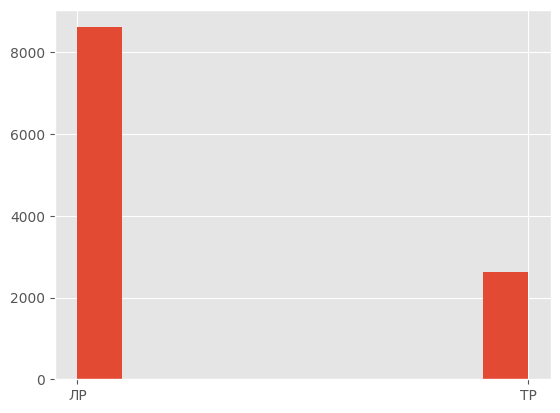

In [383]:
plt.hist(cutting['Operation']);

In [384]:
cols = ['Width', 'Length', 'Cut_length', 'Cut_quantity',
        'material_mark', 'thickness', 'converted_Time',
        'th_group', 'avg_group_speed']

/tmp/ipykernel_3647/750186957.py:14: DeprecationWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, pd.CategoricalDtype) instead
  if pd.api.types.is_string_dtype(cutting[col]) or pd.api.types.is_categorical_dtype(cutting[col]):
/tmp/ipykernel_3647/750186957.py:14: DeprecationWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, pd.CategoricalDtype) instead
  if pd.api.types.is_string_dtype(cutting[col]) or pd.api.types.is_categorical_dtype(cutting[col]):
/tmp/ipykernel_3647/750186957.py:14: DeprecationWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, pd.CategoricalDtype) instead
  if pd.api.types.is_string_dtype(cutting[col]) or pd.api.types.is_categorical_dtype(cutting[col]):
/tmp/ipykernel_3647/750186957.py:14: DeprecationWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(

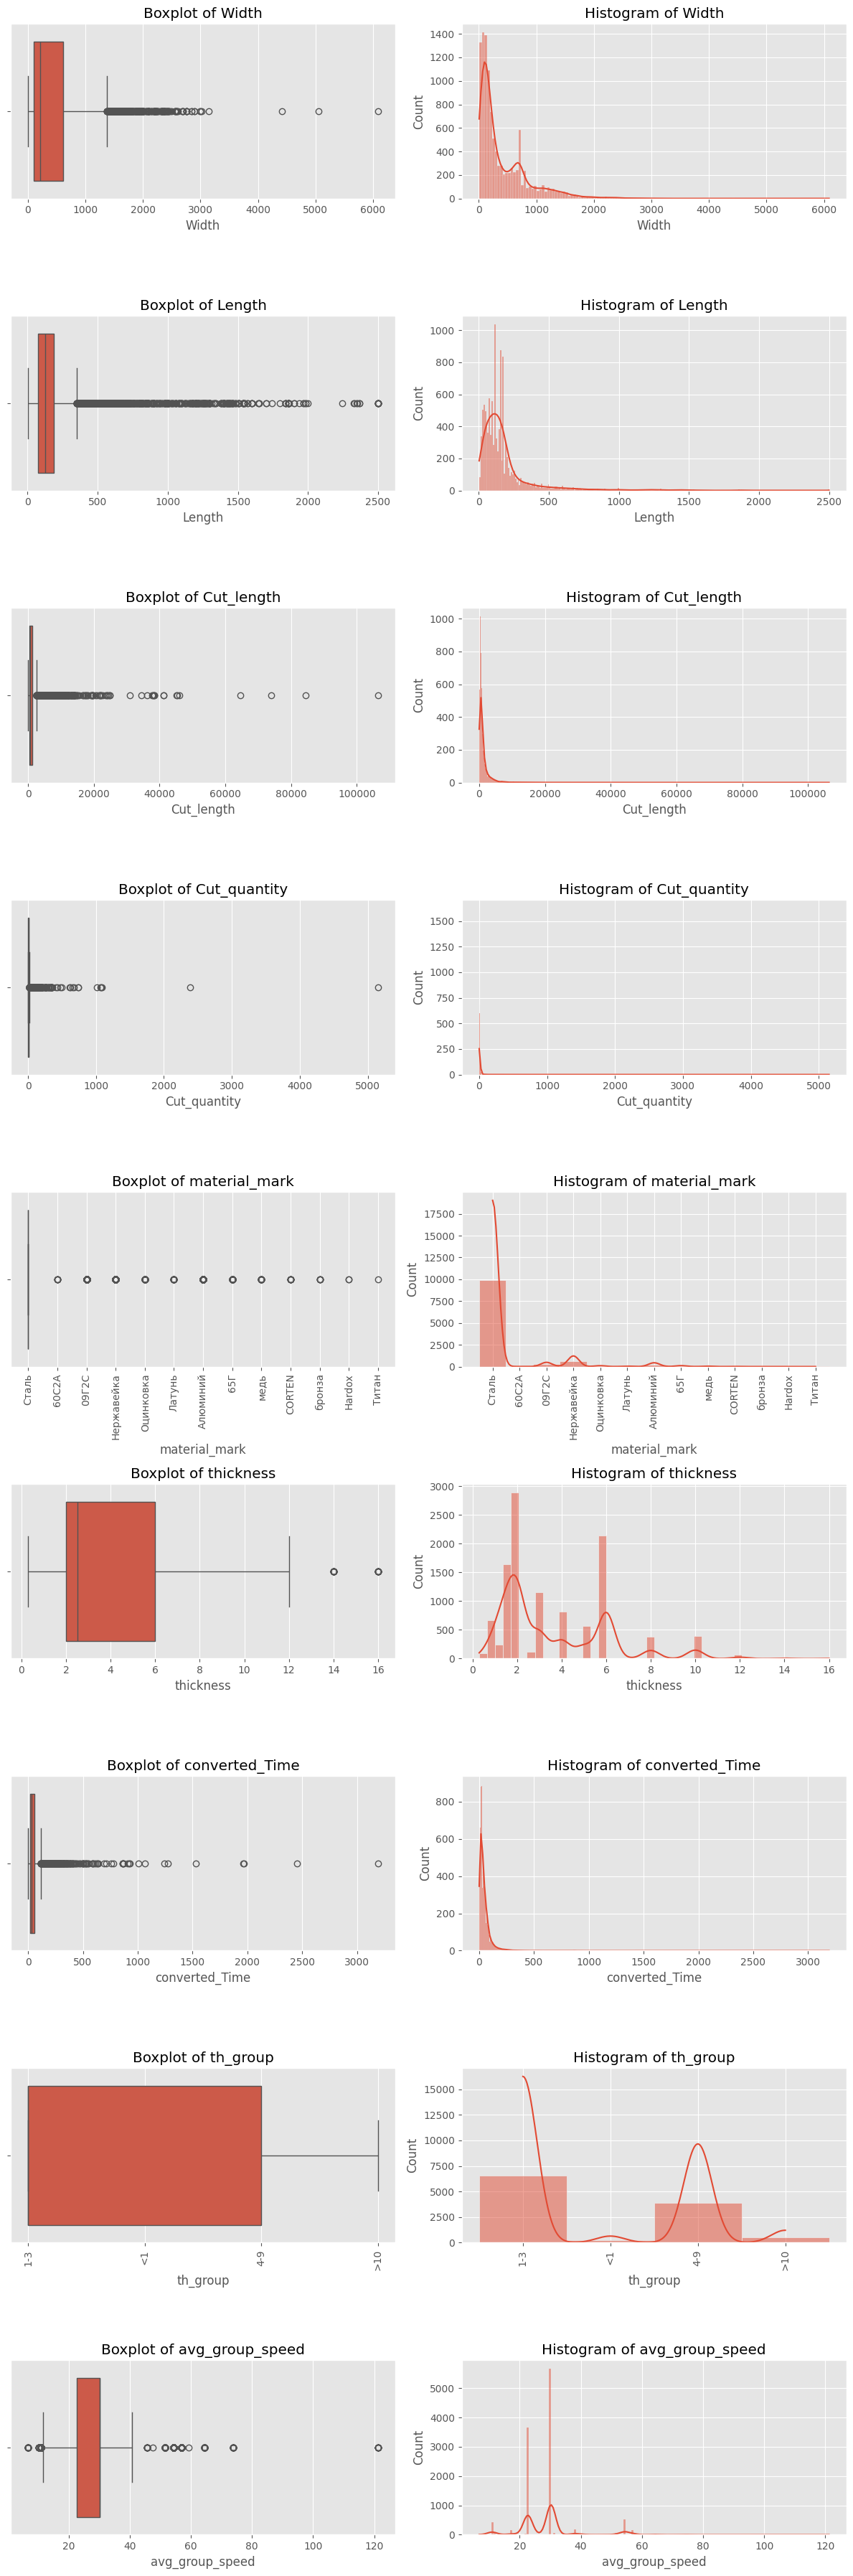

In [385]:

ncols = 2
nrows = len(cols)
fig, ax = plt.subplots(nrows, ncols, figsize=(12, 4 * nrows))

# Построение графиков
for i, col in enumerate(cols):
    sns.boxplot(x=cutting[col], ax=ax[i, 0])
    ax[i, 0].set_title(f'Boxplot of {col}')
    
    sns.histplot(cutting[col], kde=True, ax=ax[i, 1])
    ax[i, 1].set_title(f'Histogram of {col}')
    
    # Проверка типа данных и установка горизонтальных подписей
    if pd.api.types.is_string_dtype(cutting[col]) or pd.api.types.is_categorical_dtype(cutting[col]):
        ax[i, 0].set_xticklabels(ax[i, 0].get_xticklabels(), rotation=90)
        ax[i, 1].set_xticklabels(ax[i, 1].get_xticklabels(), rotation=90)

# Автоматическое распределение графиков
plt.tight_layout()


## Feature engineering

In [386]:
cutting.head(3)

,Part_name,Material,Operation,hash,Time,Width,Length,Cut_length,Cut_quantity,keywords,keywords_count,material_mark,thickness,converted_Time,th_group,avg_group_time,avg_group_length,avg_group_speed
0,Круг 40,"лист х/к т. 3,0 мм.",ЛР,42af1b9fc3,00:00:03.5,40.000,40.000,126,1,[круг],7.000,Сталь,3.000,4.000,1-3,42.821,1296.594,30.279
14,"След 1,3 ст3.Л3,0","лист х/к т. 3,0 мм.",ЛР,42d871d3ed,00:00:07.5,62.000,111.000,304,1,"[след, ст]",111.000,Сталь,3.000,8.000,1-3,42.821,1296.594,30.279
17,100-15.214.03 Перекладина низ,"труба проф. 40*40*2,0",ТР,1588a8230e,00:00:46.7,356.000,155.000,581,12,"[перекладина, низ]",514.500,Сталь,2.000,47.000,1-3,42.821,1296.594,30.279


Попробую добавить признак, который будет условно характеризовать "плотность" резки.

Т.е насколько больше\меньше реза на единицу площади. Как будто должно быть так:

$$
\frac{\text{Длина реза} * \text{Количество врезок}}{\text{Длина детали} * \text{Ширина детали}}
$$

In [387]:
cutting['density'] = (
    (cutting['Cut_length'] * cutting['Cut_quantity']) /
    (cutting['Width'] * cutting['Length'])
)

In [388]:
cutting

,Part_name,Material,Operation,hash,Time,Width,Length,Cut_length,Cut_quantity,keywords,keywords_count,material_mark,thickness,converted_Time,th_group,avg_group_time,avg_group_length,avg_group_speed,density
0,Круг 40,"лист х/к т. 3,0 мм.",ЛР,42af1b9fc3,00:00:03.5,40.000,40.000,126,1,[круг],7.000,Сталь,3.000,4.000,1-3,42.821,1296.594,30.279,0.079
14,"След 1,3 ст3.Л3,0","лист х/к т. 3,0 мм.",ЛР,42d871d3ed,00:00:07.5,62.000,111.000,304,1,"[след, ст]",111.000,Сталь,3.000,8.000,1-3,42.821,1296.594,30.279,0.044
17,100-15.214.03 Перекладина низ,"труба проф. 40*40*2,0",ТР,1588a8230e,00:00:46.7,356.000,155.000,581,12,"[перекладина, низ]",514.500,Сталь,2.000,47.000,1-3,42.821,1296.594,30.279,0.126
32,Стойка центр.-2 Тр 40х40х2,"труба проф. 40*40*2,0",ТР,159f68e7c2,00:00:53.3,1156.000,155.000,517,15,"[стойка, центр, тр]",512.000,Сталь,2.000,53.000,1-3,42.821,1296.594,30.279,0.043
57,100-15.214.04 Стойка,"труба проф. 40*40*2,0",ТР,15b9fcda05,00:01:44.9,1576.000,155.000,714,35,[стойка],948.000,Сталь,2.000,105.000,1-3,42.821,1296.594,30.279,0.102
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
484239,кот,"лист х/к т. 1,5 мм.",ЛР,3440361497,00:00:14.4,50.000,75.000,376,4,[кот],2.000,Сталь,1.500,14.000,1-3,42.821,1296.594,30.279,0.401
484390,кот лицо,"лист х/к т. 1,5 мм.",ЛР,34ee7f970c,00:00:20.2,50.000,68.000,438,9,"[кот, лицо]",1.500,Сталь,1.500,20.000,1-3,42.821,1296.594,30.279,1.159
484525,99.455-3.01 ТУРОН 40х20х2 Балка поддержки,"труба проф. 40*20*2,0",ТР,18388e1a71,00:00:42.8,265.000,115.000,469,8,"[турон, балка, поддержки]",204.333,Сталь,2.000,43.000,1-3,42.821,1296.594,30.279,0.123
484526,облако,"лист х/к т. 1,5 мм.",ЛР,340c586b88,00:00:07.9,48.000,61.000,229,5,[облако],1.000,Сталь,1.500,8.000,1-3,42.821,1296.594,30.279,0.391


Создадим признак, характеризующий форму детали. Отношение длины к ширине. 

In [389]:
cutting['L/W'] = cutting['Length'] / cutting['Width']
cutting

,Part_name,Material,Operation,hash,Time,Width,Length,Cut_length,Cut_quantity,keywords,keywords_count,material_mark,thickness,converted_Time,th_group,avg_group_time,avg_group_length,avg_group_speed,density,L/W
0,Круг 40,"лист х/к т. 3,0 мм.",ЛР,42af1b9fc3,00:00:03.5,40.000,40.000,126,1,[круг],7.000,Сталь,3.000,4.000,1-3,42.821,1296.594,30.279,0.079,1.000
14,"След 1,3 ст3.Л3,0","лист х/к т. 3,0 мм.",ЛР,42d871d3ed,00:00:07.5,62.000,111.000,304,1,"[след, ст]",111.000,Сталь,3.000,8.000,1-3,42.821,1296.594,30.279,0.044,1.790
17,100-15.214.03 Перекладина низ,"труба проф. 40*40*2,0",ТР,1588a8230e,00:00:46.7,356.000,155.000,581,12,"[перекладина, низ]",514.500,Сталь,2.000,47.000,1-3,42.821,1296.594,30.279,0.126,0.435
32,Стойка центр.-2 Тр 40х40х2,"труба проф. 40*40*2,0",ТР,159f68e7c2,00:00:53.3,1156.000,155.000,517,15,"[стойка, центр, тр]",512.000,Сталь,2.000,53.000,1-3,42.821,1296.594,30.279,0.043,0.134
57,100-15.214.04 Стойка,"труба проф. 40*40*2,0",ТР,15b9fcda05,00:01:44.9,1576.000,155.000,714,35,[стойка],948.000,Сталь,2.000,105.000,1-3,42.821,1296.594,30.279,0.102,0.098
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
484239,кот,"лист х/к т. 1,5 мм.",ЛР,3440361497,00:00:14.4,50.000,75.000,376,4,[кот],2.000,Сталь,1.500,14.000,1-3,42.821,1296.594,30.279,0.401,1.500
484390,кот лицо,"лист х/к т. 1,5 мм.",ЛР,34ee7f970c,00:00:20.2,50.000,68.000,438,9,"[кот, лицо]",1.500,Сталь,1.500,20.000,1-3,42.821,1296.594,30.279,1.159,1.360
484525,99.455-3.01 ТУРОН 40х20х2 Балка поддержки,"труба проф. 40*20*2,0",ТР,18388e1a71,00:00:42.8,265.000,115.000,469,8,"[турон, балка, поддержки]",204.333,Сталь,2.000,43.000,1-3,42.821,1296.594,30.279,0.123,0.434
484526,облако,"лист х/к т. 1,5 мм.",ЛР,340c586b88,00:00:07.9,48.000,61.000,229,5,[облако],1.000,Сталь,1.500,8.000,1-3,42.821,1296.594,30.279,0.391,1.271


## Кодирование и заполнение пропусков

In [390]:
cutting.isna().sum()

Part_name              0
Material               0
Operation              0
hash                   0
Time                   0
Width                  0
Length                 0
Cut_length             0
Cut_quantity           0
keywords               0
keywords_count      2571
material_mark          0
thickness              0
converted_Time         0
th_group               0
avg_group_time         0
avg_group_length       0
avg_group_speed        0
density                0
L/W                    0
dtype: int64

Остались не переведены в числа столбцы операция и материал + нужно заполнить пропуски в keywords_counts

С операцией всего 2 значения, просто присвоим числа

In [391]:
mapping = {'ЛР': 1,
          'ТР': 2}

cutting['operation_num'] = cutting['Operation'].replace(mapping)

cutting

/tmp/ipykernel_3647/1618427222.py:4: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  cutting['operation_num'] = cutting['Operation'].replace(mapping)


,Part_name,Material,Operation,hash,Time,Width,Length,Cut_length,Cut_quantity,keywords,keywords_count,material_mark,thickness,converted_Time,th_group,avg_group_time,avg_group_length,avg_group_speed,density,L/W,operation_num
0,Круг 40,"лист х/к т. 3,0 мм.",ЛР,42af1b9fc3,00:00:03.5,40.000,40.000,126,1,[круг],7.000,Сталь,3.000,4.000,1-3,42.821,1296.594,30.279,0.079,1.000,1
14,"След 1,3 ст3.Л3,0","лист х/к т. 3,0 мм.",ЛР,42d871d3ed,00:00:07.5,62.000,111.000,304,1,"[след, ст]",111.000,Сталь,3.000,8.000,1-3,42.821,1296.594,30.279,0.044,1.790,1
17,100-15.214.03 Перекладина низ,"труба проф. 40*40*2,0",ТР,1588a8230e,00:00:46.7,356.000,155.000,581,12,"[перекладина, низ]",514.500,Сталь,2.000,47.000,1-3,42.821,1296.594,30.279,0.126,0.435,2
32,Стойка центр.-2 Тр 40х40х2,"труба проф. 40*40*2,0",ТР,159f68e7c2,00:00:53.3,1156.000,155.000,517,15,"[стойка, центр, тр]",512.000,Сталь,2.000,53.000,1-3,42.821,1296.594,30.279,0.043,0.134,2
57,100-15.214.04 Стойка,"труба проф. 40*40*2,0",ТР,15b9fcda05,00:01:44.9,1576.000,155.000,714,35,[стойка],948.000,Сталь,2.000,105.000,1-3,42.821,1296.594,30.279,0.102,0.098,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
484239,кот,"лист х/к т. 1,5 мм.",ЛР,3440361497,00:00:14.4,50.000,75.000,376,4,[кот],2.000,Сталь,1.500,14.000,1-3,42.821,1296.594,30.279,0.401,1.500,1
484390,кот лицо,"лист х/к т. 1,5 мм.",ЛР,34ee7f970c,00:00:20.2,50.000,68.000,438,9,"[кот, лицо]",1.500,Сталь,1.500,20.000,1-3,42.821,1296.594,30.279,1.159,1.360,1
484525,99.455-3.01 ТУРОН 40х20х2 Балка поддержки,"труба проф. 40*20*2,0",ТР,18388e1a71,00:00:42.8,265.000,115.000,469,8,"[турон, балка, поддержки]",204.333,Сталь,2.000,43.000,1-3,42.821,1296.594,30.279,0.123,0.434,2
484526,облако,"лист х/к т. 1,5 мм.",ЛР,340c586b88,00:00:07.9,48.000,61.000,229,5,[облако],1.000,Сталь,1.500,8.000,1-3,42.821,1296.594,30.279,0.391,1.271,1


Материалов не очень много, так что возьмем классический one hot

In [392]:
one_hot = OneHotEncoder(dtype=int)

encoded_array = one_hot.fit_transform(cutting[['material_mark']]).toarray()
temp = pd.DataFrame(encoded_array, columns=one_hot.get_feature_names_out(['material_mark']),
                    index=cutting.index)

cutting = pd.concat([cutting, temp], axis=1)
cutting

,Part_name,Material,Operation,hash,Time,Width,Length,Cut_length,Cut_quantity,keywords,keywords_count,material_mark,thickness,converted_Time,th_group,avg_group_time,avg_group_length,avg_group_speed,density,L/W,operation_num,material_mark_09Г2С,material_mark_60С2А,material_mark_65Г,material_mark_CORTEN,material_mark_Hardox,material_mark_Алюминий,material_mark_Латунь,material_mark_Нержавейка,material_mark_Оцинковка,material_mark_Сталь,material_mark_Титан,material_mark_бронза,material_mark_медь
0,Круг 40,"лист х/к т. 3,0 мм.",ЛР,42af1b9fc3,00:00:03.5,40.000,40.000,126,1,[круг],7.000,Сталь,3.000,4.000,1-3,42.821,1296.594,30.279,0.079,1.000,1,0,0,0,0,0,0,0,0,0,1,0,0,0
14,"След 1,3 ст3.Л3,0","лист х/к т. 3,0 мм.",ЛР,42d871d3ed,00:00:07.5,62.000,111.000,304,1,"[след, ст]",111.000,Сталь,3.000,8.000,1-3,42.821,1296.594,30.279,0.044,1.790,1,0,0,0,0,0,0,0,0,0,1,0,0,0
17,100-15.214.03 Перекладина низ,"труба проф. 40*40*2,0",ТР,1588a8230e,00:00:46.7,356.000,155.000,581,12,"[перекладина, низ]",514.500,Сталь,2.000,47.000,1-3,42.821,1296.594,30.279,0.126,0.435,2,0,0,0,0,0,0,0,0,0,1,0,0,0
32,Стойка центр.-2 Тр 40х40х2,"труба проф. 40*40*2,0",ТР,159f68e7c2,00:00:53.3,1156.000,155.000,517,15,"[стойка, центр, тр]",512.000,Сталь,2.000,53.000,1-3,42.821,1296.594,30.279,0.043,0.134,2,0,0,0,0,0,0,0,0,0,1,0,0,0
57,100-15.214.04 Стойка,"труба проф. 40*40*2,0",ТР,15b9fcda05,00:01:44.9,1576.000,155.000,714,35,[стойка],948.000,Сталь,2.000,105.000,1-3,42.821,1296.594,30.279,0.102,0.098,2,0,0,0,0,0,0,0,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
484239,кот,"лист х/к т. 1,5 мм.",ЛР,3440361497,00:00:14.4,50.000,75.000,376,4,[кот],2.000,Сталь,1.500,14.000,1-3,42.821,1296.594,30.279,0.401,1.500,1,0,0,0,0,0,0,0,0,0,1,0,0,0
484390,кот лицо,"лист х/к т. 1,5 мм.",ЛР,34ee7f970c,00:00:20.2,50.000,68.000,438,9,"[кот, лицо]",1.500,Сталь,1.500,20.000,1-3,42.821,1296.594,30.279,1.159,1.360,1,0,0,0,0,0,0,0,0,0,1,0,0,0
484525,99.455-3.01 ТУРОН 40х20х2 Балка поддержки,"труба проф. 40*20*2,0",ТР,18388e1a71,00:00:42.8,265.000,115.000,469,8,"[турон, балка, поддержки]",204.333,Сталь,2.000,43.000,1-3,42.821,1296.594,30.279,0.123,0.434,2,0,0,0,0,0,0,0,0,0,1,0,0,0
484526,облако,"лист х/к т. 1,5 мм.",ЛР,340c586b88,00:00:07.9,48.000,61.000,229,5,[облако],1.000,Сталь,1.500,8.000,1-3,42.821,1296.594,30.279,0.391,1.271,1,0,0,0,0,0,0,0,0,0,1,0,0,0


In [393]:
cutting.columns

Index(['Part_name', 'Material', 'Operation', 'hash', 'Time', 'Width', 'Length', 'Cut_length', 'Cut_quantity', 'keywords', 'keywords_count', 'material_mark', 'thickness', 'converted_Time', 'th_group', 'avg_group_time', 'avg_group_length', 'avg_group_speed', 'density', 'L/W', 'operation_num', 'material_mark_09Г2С', 'material_mark_60С2А', 'material_mark_65Г', 'material_mark_CORTEN', 'material_mark_Hardox', 'material_mark_Алюминий', 'material_mark_Латунь', 'material_mark_Нержавейка', 'material_mark_Оцинковка', 'material_mark_Сталь', 'material_mark_Титан', 'material_mark_бронза', 'material_mark_медь'], dtype='object')

Теперь осталось заполнить пропуски в keywords. Возьмем knn

In [394]:
scaler = StandardScaler()

columns=['Width', 'Length', 'Cut_length', 'Cut_quantity',
         'keywords_count', 'thickness', 'converted_Time',
         'avg_group_speed', 'density', 'L/W', 'operation_num',
         'material_mark_09Г2С', 'material_mark_60С2А', 'material_mark_65Г',
         'material_mark_CORTEN', 'material_mark_Hardox', 'material_mark_Алюминий', 
         'material_mark_Латунь', 'material_mark_Нержавейка', 'material_mark_Оцинковка',
         'material_mark_Сталь', 'material_mark_Титан', 'material_mark_бронза',
         'material_mark_медь']

scaled_df=pd.DataFrame(scaler.fit_transform(cutting[columns]), columns = columns, index=cutting.index)
scaled_df

,Width,Length,Cut_length,Cut_quantity,keywords_count,thickness,converted_Time,avg_group_speed,density,L/W,operation_num,material_mark_09Г2С,material_mark_60С2А,material_mark_65Г,material_mark_CORTEN,material_mark_Hardox,material_mark_Алюминий,material_mark_Латунь,material_mark_Нержавейка,material_mark_Оцинковка,material_mark_Сталь,material_mark_Титан,material_mark_бронза,material_mark_медь
0,-0.813,-0.622,-0.425,-0.159,-1.090,-0.236,-0.558,0.156,-0.057,-0.022,-0.552,-0.152,-0.023,-0.071,-0.028,-0.013,-0.144,-0.046,-0.245,-0.069,0.362,-0.009,-0.021,-0.047
14,-0.764,-0.319,-0.361,-0.159,-0.805,-0.236,-0.507,0.156,-0.061,0.390,-0.552,-0.152,-0.023,-0.071,-0.028,-0.013,-0.144,-0.046,-0.245,-0.069,0.362,-0.009,-0.021,-0.047
17,-0.108,-0.131,-0.260,0.014,0.300,-0.643,-0.003,0.156,-0.052,-0.316,1.812,-0.152,-0.023,-0.071,-0.028,-0.013,-0.144,-0.046,-0.245,-0.069,0.362,-0.009,-0.021,-0.047
32,1.679,-0.131,-0.283,0.062,0.293,-0.643,0.074,0.156,-0.061,-0.473,1.812,-0.152,-0.023,-0.071,-0.028,-0.013,-0.144,-0.046,-0.245,-0.069,0.362,-0.009,-0.021,-0.047
57,2.618,-0.131,-0.212,0.377,1.487,-0.643,0.746,0.156,-0.055,-0.492,1.812,-0.152,-0.023,-0.071,-0.028,-0.013,-0.144,-0.046,-0.245,-0.069,0.362,-0.009,-0.021,-0.047
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
484239,-0.791,-0.473,-0.335,-0.112,-1.104,-0.846,-0.429,0.156,-0.021,0.239,-0.552,-0.152,-0.023,-0.071,-0.028,-0.013,-0.144,-0.046,-0.245,-0.069,0.362,-0.009,-0.021,-0.047
484390,-0.791,-0.503,-0.312,-0.033,-1.105,-0.846,-0.352,0.156,0.065,0.166,-0.552,-0.152,-0.023,-0.071,-0.028,-0.013,-0.144,-0.046,-0.245,-0.069,0.362,-0.009,-0.021,-0.047
484525,-0.311,-0.302,-0.301,-0.049,-0.550,-0.643,-0.055,0.156,-0.052,-0.317,1.812,-0.152,-0.023,-0.071,-0.028,-0.013,-0.144,-0.046,-0.245,-0.069,0.362,-0.009,-0.021,-0.047
484526,-0.796,-0.533,-0.388,-0.096,-1.106,-0.846,-0.507,0.156,-0.022,0.120,-0.552,-0.152,-0.023,-0.071,-0.028,-0.013,-0.144,-0.046,-0.245,-0.069,0.362,-0.009,-0.021,-0.047


In [395]:
imputer = KNNImputer(n_neighbors=3, weights="uniform")
cutting_input = pd.DataFrame(imputer.fit_transform(scaled_df),columns=columns, index=cutting.index)
cutting_input

,Width,Length,Cut_length,Cut_quantity,keywords_count,thickness,converted_Time,avg_group_speed,density,L/W,operation_num,material_mark_09Г2С,material_mark_60С2А,material_mark_65Г,material_mark_CORTEN,material_mark_Hardox,material_mark_Алюминий,material_mark_Латунь,material_mark_Нержавейка,material_mark_Оцинковка,material_mark_Сталь,material_mark_Титан,material_mark_бронза,material_mark_медь
0,-0.813,-0.622,-0.425,-0.159,-1.090,-0.236,-0.558,0.156,-0.057,-0.022,-0.552,-0.152,-0.023,-0.071,-0.028,-0.013,-0.144,-0.046,-0.245,-0.069,0.362,-0.009,-0.021,-0.047
14,-0.764,-0.319,-0.361,-0.159,-0.805,-0.236,-0.507,0.156,-0.061,0.390,-0.552,-0.152,-0.023,-0.071,-0.028,-0.013,-0.144,-0.046,-0.245,-0.069,0.362,-0.009,-0.021,-0.047
17,-0.108,-0.131,-0.260,0.014,0.300,-0.643,-0.003,0.156,-0.052,-0.316,1.812,-0.152,-0.023,-0.071,-0.028,-0.013,-0.144,-0.046,-0.245,-0.069,0.362,-0.009,-0.021,-0.047
32,1.679,-0.131,-0.283,0.062,0.293,-0.643,0.074,0.156,-0.061,-0.473,1.812,-0.152,-0.023,-0.071,-0.028,-0.013,-0.144,-0.046,-0.245,-0.069,0.362,-0.009,-0.021,-0.047
57,2.618,-0.131,-0.212,0.377,1.487,-0.643,0.746,0.156,-0.055,-0.492,1.812,-0.152,-0.023,-0.071,-0.028,-0.013,-0.144,-0.046,-0.245,-0.069,0.362,-0.009,-0.021,-0.047
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
484239,-0.791,-0.473,-0.335,-0.112,-1.104,-0.846,-0.429,0.156,-0.021,0.239,-0.552,-0.152,-0.023,-0.071,-0.028,-0.013,-0.144,-0.046,-0.245,-0.069,0.362,-0.009,-0.021,-0.047
484390,-0.791,-0.503,-0.312,-0.033,-1.105,-0.846,-0.352,0.156,0.065,0.166,-0.552,-0.152,-0.023,-0.071,-0.028,-0.013,-0.144,-0.046,-0.245,-0.069,0.362,-0.009,-0.021,-0.047
484525,-0.311,-0.302,-0.301,-0.049,-0.550,-0.643,-0.055,0.156,-0.052,-0.317,1.812,-0.152,-0.023,-0.071,-0.028,-0.013,-0.144,-0.046,-0.245,-0.069,0.362,-0.009,-0.021,-0.047
484526,-0.796,-0.533,-0.388,-0.096,-1.106,-0.846,-0.507,0.156,-0.022,0.120,-0.552,-0.152,-0.023,-0.071,-0.028,-0.013,-0.144,-0.046,-0.245,-0.069,0.362,-0.009,-0.021,-0.047


In [396]:
cutting_input = pd.DataFrame(scaler.inverse_transform(cutting_input), columns=cutting_input.columns, index=cutting.index)
cutting_input

,Width,Length,Cut_length,Cut_quantity,keywords_count,thickness,converted_Time,avg_group_speed,density,L/W,operation_num,material_mark_09Г2С,material_mark_60С2А,material_mark_65Г,material_mark_CORTEN,material_mark_Hardox,material_mark_Алюминий,material_mark_Латунь,material_mark_Нержавейка,material_mark_Оцинковка,material_mark_Сталь,material_mark_Титан,material_mark_бронза,material_mark_медь
0,40.000,40.000,126.000,1.000,7.000,3.000,4.000,30.279,0.079,1.000,1.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,-0.000,1.000,0.000,0.000,0.000
14,62.000,111.000,304.000,1.000,111.000,3.000,8.000,30.279,0.044,1.790,1.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,-0.000,1.000,0.000,0.000,0.000
17,356.000,155.000,581.000,12.000,514.500,2.000,47.000,30.279,0.126,0.435,2.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,-0.000,1.000,0.000,0.000,0.000
32,1156.000,155.000,517.000,15.000,512.000,2.000,53.000,30.279,0.043,0.134,2.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,-0.000,1.000,0.000,0.000,0.000
57,1576.000,155.000,714.000,35.000,948.000,2.000,105.000,30.279,0.102,0.098,2.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,-0.000,1.000,0.000,0.000,0.000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
484239,50.000,75.000,376.000,4.000,2.000,1.500,14.000,30.279,0.401,1.500,1.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,-0.000,1.000,0.000,0.000,0.000
484390,50.000,68.000,438.000,9.000,1.500,1.500,20.000,30.279,1.159,1.360,1.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,-0.000,1.000,0.000,0.000,0.000
484525,265.000,115.000,469.000,8.000,204.333,2.000,43.000,30.279,0.123,0.434,2.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,-0.000,1.000,0.000,0.000,0.000
484526,48.000,61.000,229.000,5.000,1.000,1.500,8.000,30.279,0.391,1.271,1.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,-0.000,1.000,0.000,0.000,0.000


In [397]:
cutting_input['keywords_count'].isna().sum()

0

In [398]:
cutting['keywords_count']=cutting_input['keywords_count'].apply(int)
cutting

,Part_name,Material,Operation,hash,Time,Width,Length,Cut_length,Cut_quantity,keywords,keywords_count,material_mark,thickness,converted_Time,th_group,avg_group_time,avg_group_length,avg_group_speed,density,L/W,operation_num,material_mark_09Г2С,material_mark_60С2А,material_mark_65Г,material_mark_CORTEN,material_mark_Hardox,material_mark_Алюминий,material_mark_Латунь,material_mark_Нержавейка,material_mark_Оцинковка,material_mark_Сталь,material_mark_Титан,material_mark_бронза,material_mark_медь
0,Круг 40,"лист х/к т. 3,0 мм.",ЛР,42af1b9fc3,00:00:03.5,40.000,40.000,126,1,[круг],7,Сталь,3.000,4.000,1-3,42.821,1296.594,30.279,0.079,1.000,1,0,0,0,0,0,0,0,0,0,1,0,0,0
14,"След 1,3 ст3.Л3,0","лист х/к т. 3,0 мм.",ЛР,42d871d3ed,00:00:07.5,62.000,111.000,304,1,"[след, ст]",111,Сталь,3.000,8.000,1-3,42.821,1296.594,30.279,0.044,1.790,1,0,0,0,0,0,0,0,0,0,1,0,0,0
17,100-15.214.03 Перекладина низ,"труба проф. 40*40*2,0",ТР,1588a8230e,00:00:46.7,356.000,155.000,581,12,"[перекладина, низ]",514,Сталь,2.000,47.000,1-3,42.821,1296.594,30.279,0.126,0.435,2,0,0,0,0,0,0,0,0,0,1,0,0,0
32,Стойка центр.-2 Тр 40х40х2,"труба проф. 40*40*2,0",ТР,159f68e7c2,00:00:53.3,1156.000,155.000,517,15,"[стойка, центр, тр]",512,Сталь,2.000,53.000,1-3,42.821,1296.594,30.279,0.043,0.134,2,0,0,0,0,0,0,0,0,0,1,0,0,0
57,100-15.214.04 Стойка,"труба проф. 40*40*2,0",ТР,15b9fcda05,00:01:44.9,1576.000,155.000,714,35,[стойка],948,Сталь,2.000,105.000,1-3,42.821,1296.594,30.279,0.102,0.098,2,0,0,0,0,0,0,0,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
484239,кот,"лист х/к т. 1,5 мм.",ЛР,3440361497,00:00:14.4,50.000,75.000,376,4,[кот],2,Сталь,1.500,14.000,1-3,42.821,1296.594,30.279,0.401,1.500,1,0,0,0,0,0,0,0,0,0,1,0,0,0
484390,кот лицо,"лист х/к т. 1,5 мм.",ЛР,34ee7f970c,00:00:20.2,50.000,68.000,438,9,"[кот, лицо]",1,Сталь,1.500,20.000,1-3,42.821,1296.594,30.279,1.159,1.360,1,0,0,0,0,0,0,0,0,0,1,0,0,0
484525,99.455-3.01 ТУРОН 40х20х2 Балка поддержки,"труба проф. 40*20*2,0",ТР,18388e1a71,00:00:42.8,265.000,115.000,469,8,"[турон, балка, поддержки]",204,Сталь,2.000,43.000,1-3,42.821,1296.594,30.279,0.123,0.434,2,0,0,0,0,0,0,0,0,0,1,0,0,0
484526,облако,"лист х/к т. 1,5 мм.",ЛР,340c586b88,00:00:07.9,48.000,61.000,229,5,[облако],0,Сталь,1.500,8.000,1-3,42.821,1296.594,30.279,0.391,1.271,1,0,0,0,0,0,0,0,0,0,1,0,0,0


In [399]:
len(cutting[cutting['keywords_count']==0])

69

## Визуализация (признак \ target) 

In [400]:
cutting.columns

Index(['Part_name', 'Material', 'Operation', 'hash', 'Time', 'Width', 'Length', 'Cut_length', 'Cut_quantity', 'keywords', 'keywords_count', 'material_mark', 'thickness', 'converted_Time', 'th_group', 'avg_group_time', 'avg_group_length', 'avg_group_speed', 'density', 'L/W', 'operation_num', 'material_mark_09Г2С', 'material_mark_60С2А', 'material_mark_65Г', 'material_mark_CORTEN', 'material_mark_Hardox', 'material_mark_Алюминий', 'material_mark_Латунь', 'material_mark_Нержавейка', 'material_mark_Оцинковка', 'material_mark_Сталь', 'material_mark_Титан', 'material_mark_бронза', 'material_mark_медь'], dtype='object')

In [401]:
features = ['Width', 'Length', 'Cut_length', 'Cut_quantity',
            'keywords_count', 'material_mark', 'thickness', 
            'th_group', 'avg_group_time', 'avg_group_length',
            'avg_group_speed', 'density', 'L/W']

/tmp/ipykernel_3647/2175643144.py:17: DeprecationWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, pd.CategoricalDtype) instead
  if pd.api.types.is_string_dtype(cutting[name]) or pd.api.types.is_categorical_dtype(cutting[name]):
/tmp/ipykernel_3647/2175643144.py:18: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax[row, col].set_xticklabels(ax[row, col].get_xticklabels(), rotation=90)
/tmp/ipykernel_3647/2175643144.py:19: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax[row, col].set_xticklabels(ax[row, col].get_xticklabels(), rotation=90)
/tmp/ipykernel_3647/2175643144.py:17: DeprecationWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, pd.CategoricalDtype) instead
  if pd.api.types.is_string_dtype(cutting[na

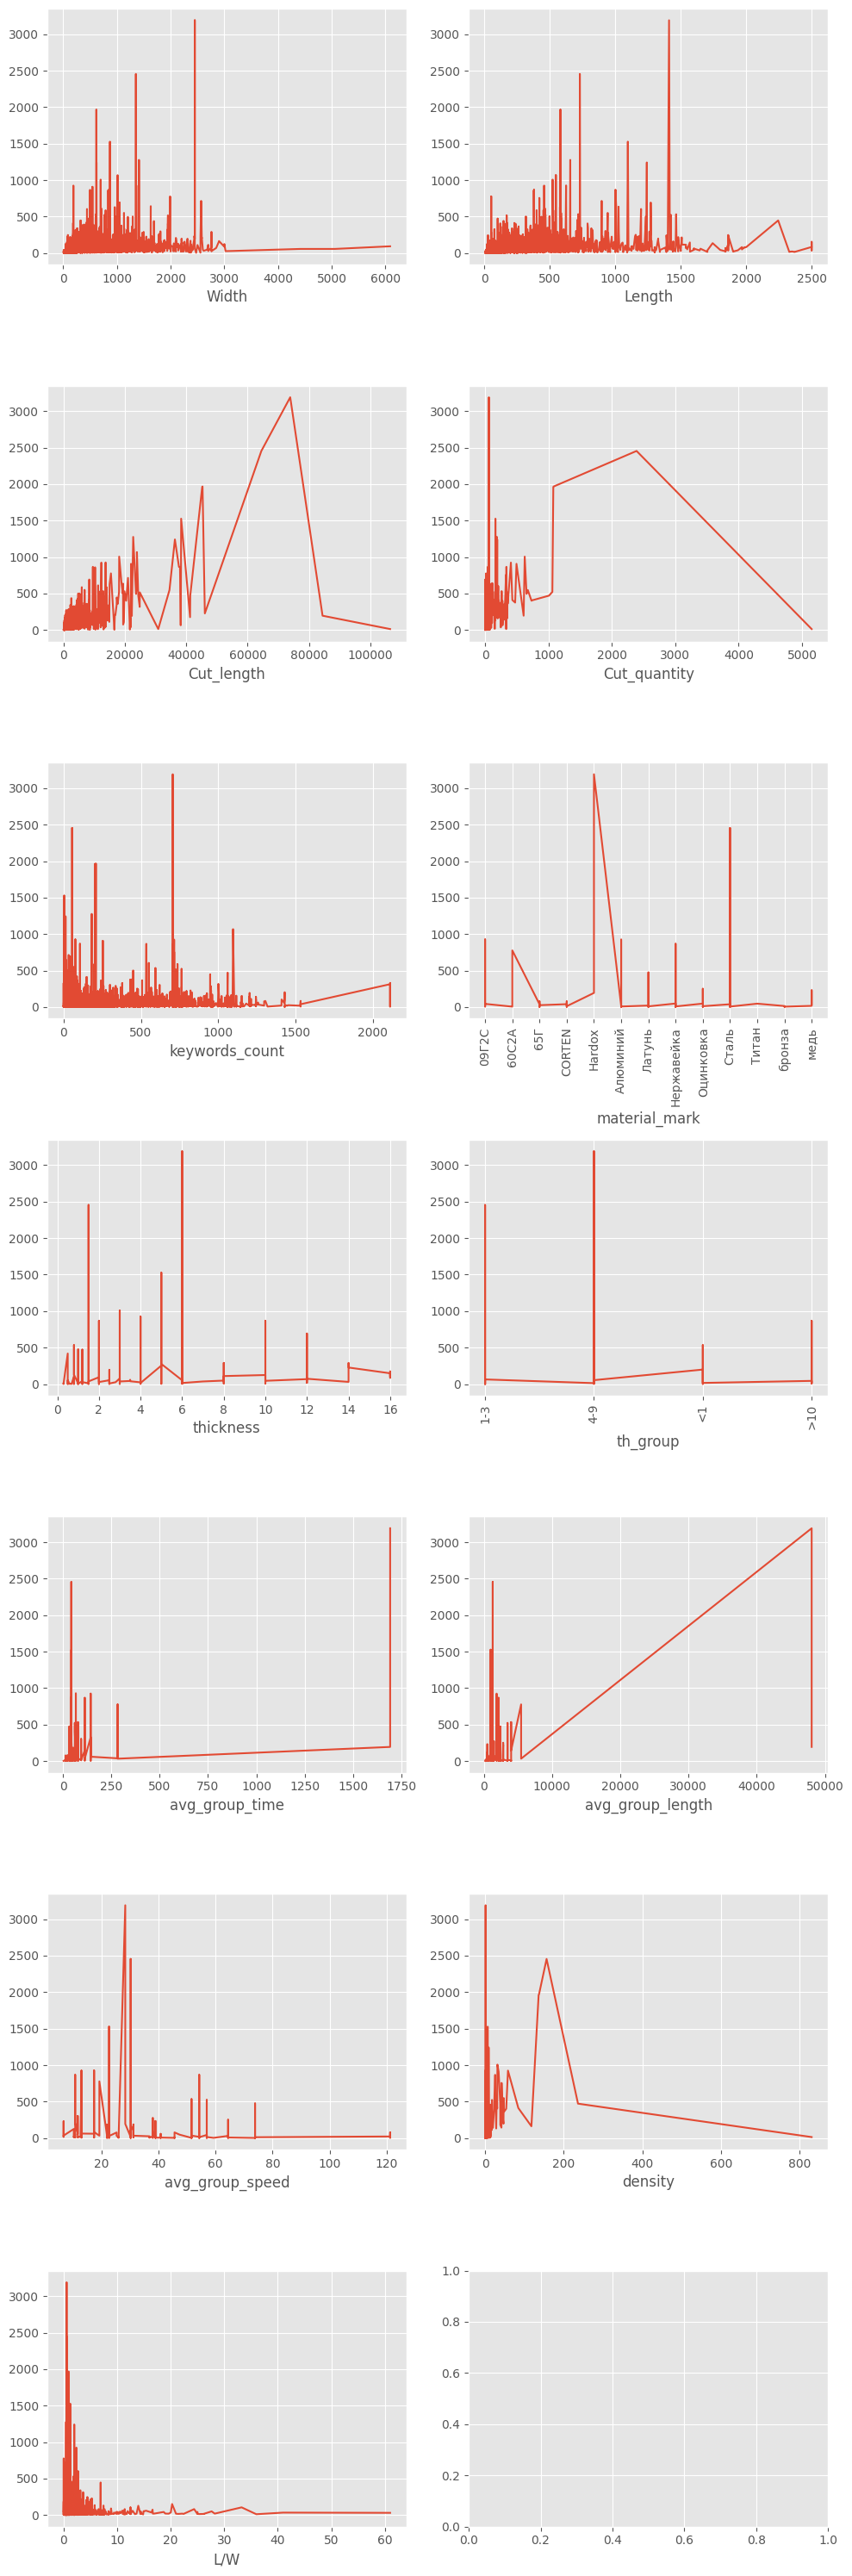

In [402]:
n_cols = 2
n_rows = len(features) // n_cols + len(features) % n_cols

fig, ax = plt.subplots(n_rows, n_cols, figsize=(10, 30))

for index, name in enumerate(features):
    col = index % n_cols
    row = index // n_cols
    
    sorted_df = cutting.sort_values(by=name)
    x = sorted_df[name]
    y = sorted_df['converted_Time']
    
    ax[row, col].plot(x, y)
    ax[row, col].set_xlabel(name)
    
    if pd.api.types.is_string_dtype(cutting[name]) or pd.api.types.is_categorical_dtype(cutting[name]):
        ax[row, col].set_xticklabels(ax[row, col].get_xticklabels(), rotation=90)
        ax[row, col].set_xticklabels(ax[row, col].get_xticklabels(), rotation=90)

plt.tight_layout()
plt.show()

Надо проверить Cut_length, очень странно время растет растет и резко падает

In [403]:
cutting[cutting['Cut_length'] > 60_000]

,Part_name,Material,Operation,hash,Time,Width,Length,Cut_length,Cut_quantity,keywords,keywords_count,material_mark,thickness,converted_Time,th_group,avg_group_time,avg_group_length,avg_group_speed,density,L/W,operation_num,material_mark_09Г2С,material_mark_60С2А,material_mark_65Г,material_mark_CORTEN,material_mark_Hardox,material_mark_Алюминий,material_mark_Латунь,material_mark_Нержавейка,material_mark_Оцинковка,material_mark_Сталь,material_mark_Титан,material_mark_бронза,material_mark_медь
131674,10.1.99.180.30.01 Экран,"лист х/к т. 1,5 мм.",ЛР,7766dbae06,00:40:55.3,1353.000,728.000,64459,2390,[экран],55,Сталь,1.500,2455.000,1-3,42.821,1296.594,30.279,156.406,0.538,1,0,0,0,0,0,0,0,0,0,1,0,0,0
215982,МРНУ.745323.002-01 Стенка задняя,"лист х/к т. 1,5 мм.",ЛР,71354733be,00:03:16.7,1202.000,914.000,84394,609,"[мрну, стенка, задняя]",114,Сталь,1.500,197.000,1-3,42.821,1296.594,30.279,46.782,0.760,1,0,0,0,0,0,0,0,0,0,1,0,0,0
335276,"HARDOX1 500.Л6,0 мм-(металл заказчика 1410х2450)","hardox-500 т. 6,0 мм. (броня)",ЛР,711bcf86fc,00:53:10.8,2450.000,1410.000,73860,61,"[мм, металл, заказчика]",706,Hardox,6.000,3191.000,4-9,1692.500,48057.000,28.394,1.304,0.576,1,0,0,0,0,1,0,0,0,0,0,0,0,0
422519,Перф. лист 1100х600х1 мм,"лист х/к т. 1,0 мм.",ЛР,44fc5325bf,00:00:13.5,1100.000,600.000,106420,5152,"[перф, лист, мм]",781,Сталь,1.000,14.000,1-3,42.821,1296.594,30.279,830.721,0.545,1,0,0,0,0,0,0,0,0,0,1,0,0,0


422519 какая-то ошибка. 13 секунд что-то нереальное, и 3 минуты тоже похоже на ошибку. Уберем

In [404]:
cutting.drop([422519, 215982], inplace=True)

In [405]:
cutting[(cutting['Cut_quantity'] < 500) &
       (cutting['converted_Time'] > 1500)]

,Part_name,Material,Operation,hash,Time,Width,Length,Cut_length,Cut_quantity,keywords,keywords_count,material_mark,thickness,converted_Time,th_group,avg_group_time,avg_group_length,avg_group_speed,density,L/W,operation_num,material_mark_09Г2С,material_mark_60С2А,material_mark_65Г,material_mark_CORTEN,material_mark_Hardox,material_mark_Алюминий,material_mark_Латунь,material_mark_Нержавейка,material_mark_Оцинковка,material_mark_Сталь,material_mark_Титан,material_mark_бронза,material_mark_медь
335276,"HARDOX1 500.Л6,0 мм-(металл заказчика 1410х2450)","hardox-500 т. 6,0 мм. (броня)",ЛР,711bcf86fc,00:53:10.8,2450.000,1410.000,73860,61,"[мм, металл, заказчика]",706,Hardox,6.000,3191.000,4-9,1692.500,48057.000,28.394,1.304,0.576,1,0,0,0,0,1,0,0,0,0,0,0,0,0
415703,Корыто_2404_2_сталь5мм,"лист г/к т. 5,0 мм.",ЛР,6524431038,00:25:26.6,870.000,1095.000,38327,164,"[корыто, стальмм]",4,Сталь,5.000,1527.000,4-9,43.538,988.990,22.716,6.598,1.259,1,0,0,0,0,0,0,0,0,0,1,0,0,0


Не похоже на выбросы

In [406]:
cutting[cutting['avg_group_time'] > 1500]

,Part_name,Material,Operation,hash,Time,Width,Length,Cut_length,Cut_quantity,keywords,keywords_count,material_mark,thickness,converted_Time,th_group,avg_group_time,avg_group_length,avg_group_speed,density,L/W,operation_num,material_mark_09Г2С,material_mark_60С2А,material_mark_65Г,material_mark_CORTEN,material_mark_Hardox,material_mark_Алюминий,material_mark_Латунь,material_mark_Нержавейка,material_mark_Оцинковка,material_mark_Сталь,material_mark_Титан,material_mark_бронза,material_mark_медь
334907,"HARDOX1 500.Л6,0 мм-(металл заказчика 550х2450)","hardox-500 т. 6,0 мм. (броня)",ЛР,7198efef65,00:03:14.4,2450.000,550.000,22254,15,"[мм, металл, заказчика]",706,Hardox,6.000,194.000,4-9,1692.500,48057.000,28.394,0.248,0.224,1,0,0,0,0,1,0,0,0,0,0,0,0,0
335276,"HARDOX1 500.Л6,0 мм-(металл заказчика 1410х2450)","hardox-500 т. 6,0 мм. (броня)",ЛР,711bcf86fc,00:53:10.8,2450.000,1410.000,73860,61,"[мм, металл, заказчика]",706,Hardox,6.000,3191.000,4-9,1692.500,48057.000,28.394,1.304,0.576,1,0,0,0,0,1,0,0,0,0,0,0,0,0


In [407]:
#Этот товарищ подозрительный, уберем
cutting.drop([334907], inplace=True)

In [408]:
cutting[(cutting['density'] > 150) &
       (cutting['converted_Time'] < 1000)]

,Part_name,Material,Operation,hash,Time,Width,Length,Cut_length,Cut_quantity,keywords,keywords_count,material_mark,thickness,converted_Time,th_group,avg_group_time,avg_group_length,avg_group_speed,density,L/W,operation_num,material_mark_09Г2С,material_mark_60С2А,material_mark_65Г,material_mark_CORTEN,material_mark_Hardox,material_mark_Алюминий,material_mark_Латунь,material_mark_Нержавейка,material_mark_Оцинковка,material_mark_Сталь,material_mark_Титан,material_mark_бронза,material_mark_медь
121291,99-1.210.01 Решетка 1040х100 мм,"лист х/к т. 1,2 мм.",ЛР,4176a6442,00:07:51.6,1040.000,100.000,24361,1009,"[решетка, мм]",1061,Сталь,1.200,472.000,1-3,42.821,1296.594,30.279,236.349,0.096,1,0,0,0,0,0,0,0,0,0,1,0,0,0


In [409]:
cutting[(cutting['Cut_length'] > 20000) &
       (cutting['material_mark'] == "Сталь")]

,Part_name,Material,Operation,hash,Time,Width,Length,Cut_length,Cut_quantity,keywords,keywords_count,material_mark,thickness,converted_Time,th_group,avg_group_time,avg_group_length,avg_group_speed,density,L/W,operation_num,material_mark_09Г2С,material_mark_60С2А,material_mark_65Г,material_mark_CORTEN,material_mark_Hardox,material_mark_Алюминий,material_mark_Латунь,material_mark_Нержавейка,material_mark_Оцинковка,material_mark_Сталь,material_mark_Титан,material_mark_бронза,material_mark_медь
17432,Раскладка 2 мм,"лист х/к т. 2,0 мм.",ЛР,609dcd51f6,00:00:14.4,791.000,943.000,30868,334,"[раскладка, мм]",1059,Сталь,2.000,14.000,1-3,42.821,1296.594,30.279,13.822,1.192,1,0,0,0,0,0,0,0,0,0,1,0,0,0
26689,10.01.04_Доп_Решетка,"лист х/к т. 1,5 мм.",ЛР,660b0c7ac1,00:02:57.3,1007.000,900.000,41233,309,"[доп, решетка]",15,Сталь,1.500,177.000,1-3,42.821,1296.594,30.279,14.058,0.894,1,0,0,0,0,0,0,0,0,0,1,0,0,0
26854,10.01.09_Доп_Решетка,"лист х/к т. 1,5 мм.",ЛР,6612f91443,00:03:48.2,1009.000,900.000,46045,335,"[доп, решетка]",15,Сталь,1.500,228.000,1-3,42.821,1296.594,30.279,16.986,0.892,1,0,0,0,0,0,0,0,0,0,1,0,0,0
73255,Развертка - 51360-0103 Конус,"лист г/к т. 4,0 мм.",ЛР,263d93a4c6,00:11:54.8,2568.000,895.000,21007,66,"[развертка, конус]",33,Сталь,4.000,715.000,4-9,43.538,988.990,22.716,0.603,0.349,1,0,0,0,0,0,0,0,0,0,1,0,0,0
82402,ТБНД.71.02.14.01_изм1 - Стенка передняя,"лист х/к т. 1,5 мм.",ЛР,35587290000000,00:32:42.5,617.000,579.000,45179,1077,"[тбнд, изм, стенка, передняя]",203,Сталь,1.500,1962.000,1-3,42.821,1296.594,30.279,136.204,0.938,1,0,0,0,0,0,0,0,0,0,1,0,0,0
82781,ТБНД.71.02.15.01_изм1 - Стенка задняя,"лист х/к т. 1,5 мм.",ЛР,35f6ee37e7,00:32:47.7,617.000,580.000,45292,1083,"[тбнд, изм, стенка, задняя]",209,Сталь,1.500,1968.000,1-3,42.821,1296.594,30.279,137.068,0.940,1,0,0,0,0,0,0,0,0,0,1,0,0,0
87184,ТБНД.71.02.12.01_изм1 - Стенка левая,"лист х/к т. 1,5 мм.",ЛР,353929ed57,00:15:07.5,545.000,580.000,22002,496,"[тбнд, изм, стенка, левая]",254,Сталь,1.500,908.000,1-3,42.821,1296.594,30.279,34.524,1.064,1,0,0,0,0,0,0,0,0,0,1,0,0,0
119044,99.100 Экран 1180х722 мм,"лист х/к т. 1,2 мм.",ЛР,65e1a43b57,00:02:44.8,1180.000,722.000,21747,23,"[экран, мм]",1084,Сталь,1.200,165.000,1-3,42.821,1296.594,30.279,0.587,0.612,1,0,0,0,0,0,0,0,0,0,1,0,0,0
121291,99-1.210.01 Решетка 1040х100 мм,"лист х/к т. 1,2 мм.",ЛР,4176a6442,00:07:51.6,1040.000,100.000,24361,1009,"[решетка, мм]",1061,Сталь,1.200,472.000,1-3,42.821,1296.594,30.279,236.349,0.096,1,0,0,0,0,0,0,0,0,0,1,0,0,0
131674,10.1.99.180.30.01 Экран,"лист х/к т. 1,5 мм.",ЛР,7766dbae06,00:40:55.3,1353.000,728.000,64459,2390,[экран],55,Сталь,1.500,2455.000,1-3,42.821,1296.594,30.279,156.406,0.538,1,0,0,0,0,0,0,0,0,0,1,0,0,0


In [410]:
cutting.drop(cutting[(cutting['Cut_length'] > 15000) &
       (cutting['converted_Time'] < 500)].index, inplace = True)

/tmp/ipykernel_3647/2175643144.py:17: DeprecationWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, pd.CategoricalDtype) instead
  if pd.api.types.is_string_dtype(cutting[name]) or pd.api.types.is_categorical_dtype(cutting[name]):
/tmp/ipykernel_3647/2175643144.py:18: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax[row, col].set_xticklabels(ax[row, col].get_xticklabels(), rotation=90)
/tmp/ipykernel_3647/2175643144.py:19: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax[row, col].set_xticklabels(ax[row, col].get_xticklabels(), rotation=90)
/tmp/ipykernel_3647/2175643144.py:17: DeprecationWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, pd.CategoricalDtype) instead
  if pd.api.types.is_string_dtype(cutting[na

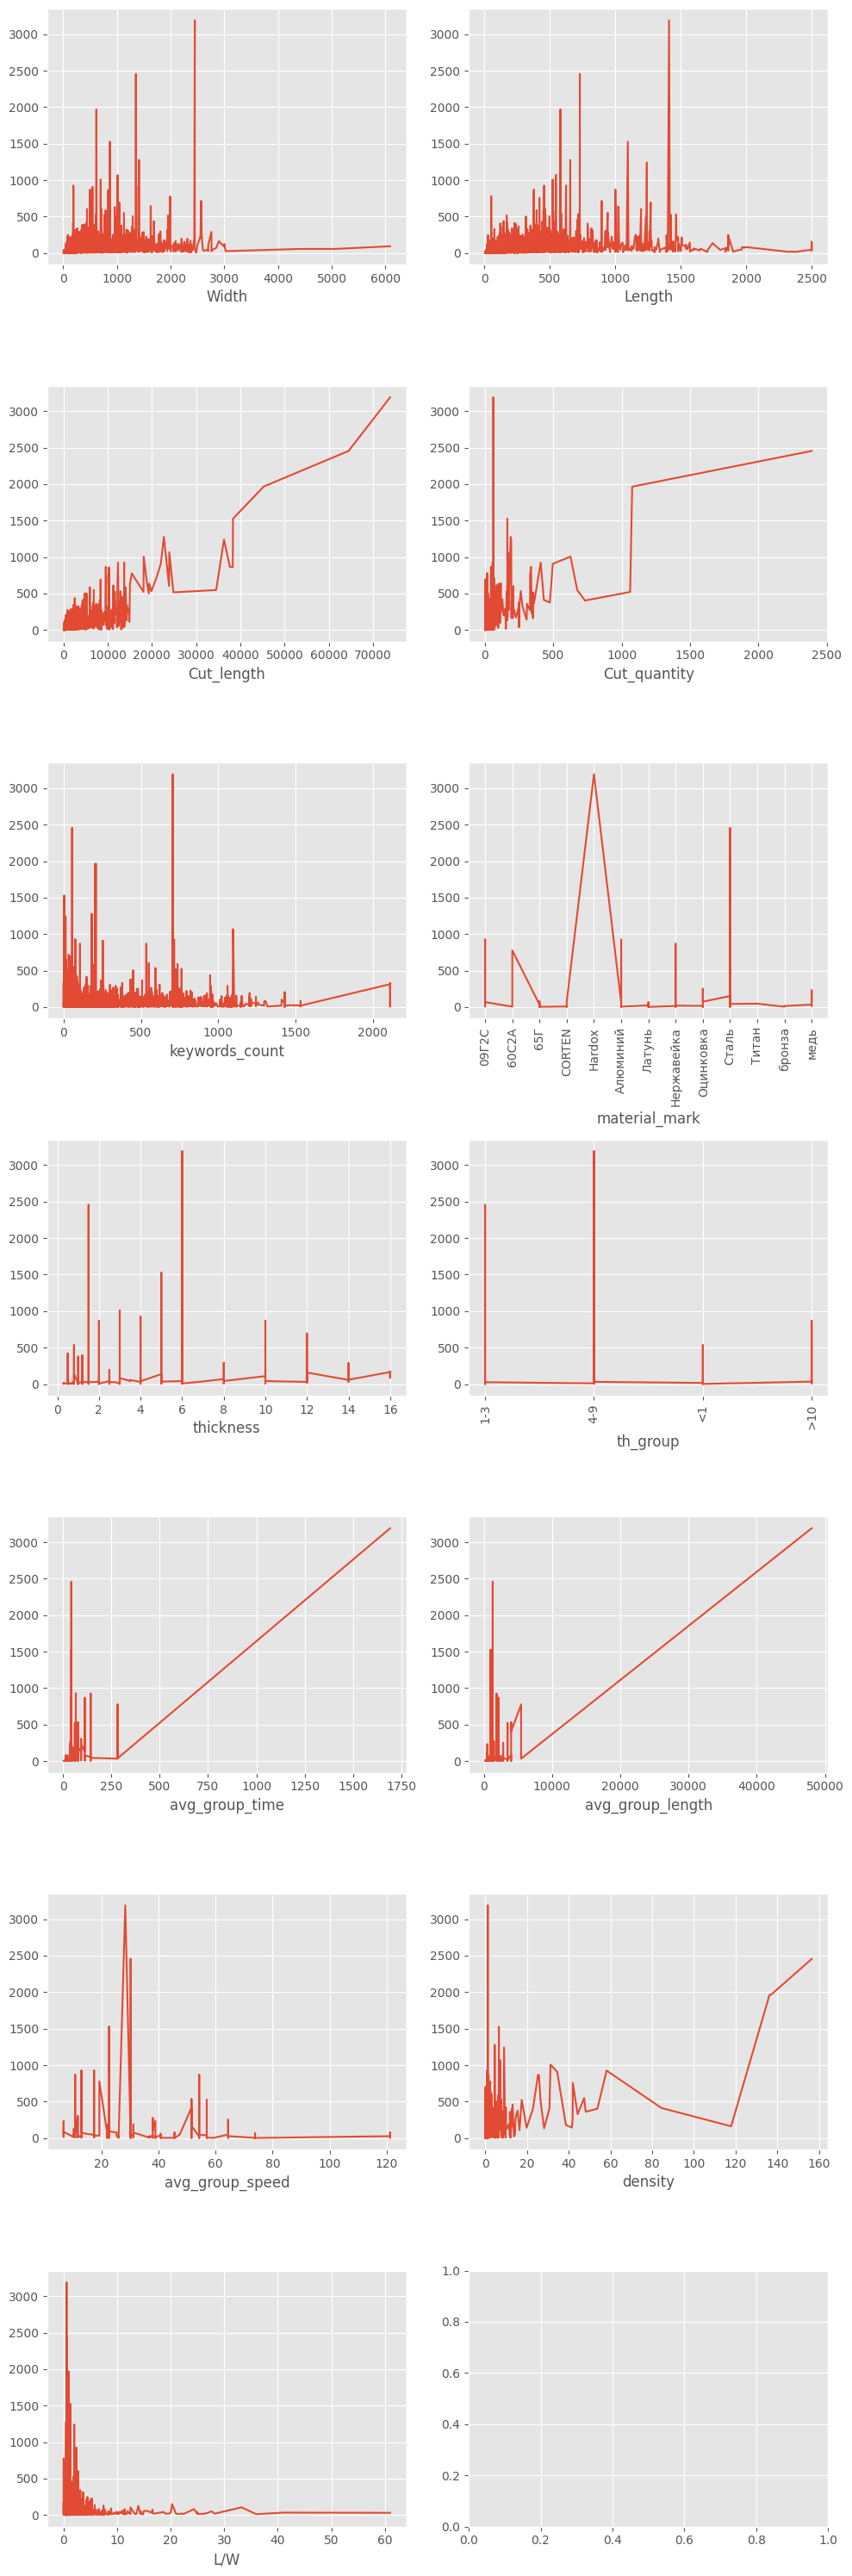

In [411]:
n_cols = 2
n_rows = len(features) // n_cols + len(features) % n_cols

fig, ax = plt.subplots(n_rows, n_cols, figsize=(10, 30))

for index, name in enumerate(features):
    col = index % n_cols
    row = index // n_cols
    
    sorted_df = cutting.sort_values(by=name)
    x = sorted_df[name]
    y = sorted_df['converted_Time']
    
    ax[row, col].plot(x, y)
    ax[row, col].set_xlabel(name)
    
    if pd.api.types.is_string_dtype(cutting[name]) or pd.api.types.is_categorical_dtype(cutting[name]):
        ax[row, col].set_xticklabels(ax[row, col].get_xticklabels(), rotation=90)
        ax[row, col].set_xticklabels(ax[row, col].get_xticklabels(), rotation=90)

plt.tight_layout()
plt.show()

# Модель